# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
import os
import glob
import h5py
import shutil

import matplotlib.image as mimg

from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import cv2
from keras import backend as K
color = sns.color_palette()
%matplotlib inline
from PIL import Image
from PIL import ImageEnhance
import keras_metrics as km
import time

# Setup File Flow
Do work here

## The below code is a way to put training data into one list if flow_from_directory is not used. This is good for small data sets but impracticle for large ones.  There is also a visualization to view data balances.

In [5]:
data_dir = '/home/jordan/Data/xrays/chest_xray/chest_xray/train'

categories = ['NORMAL', 'PNEUMONIA']


img_size = 125

training_data = []


def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass


create_training_data()

In [6]:
len(training_data)

5216

In [7]:
import random

random.shuffle(training_data)

1    3875
0    1341
Name: label, dtype: int64


<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Number of cases')

Text(0.5, 0, 'Case type')

Text(0, 0.5, 'Count')

([<matplotlib.axis.XTick at 0x7fd88e6f8b38>,
 <a list of 2 Text xticklabel objects>)

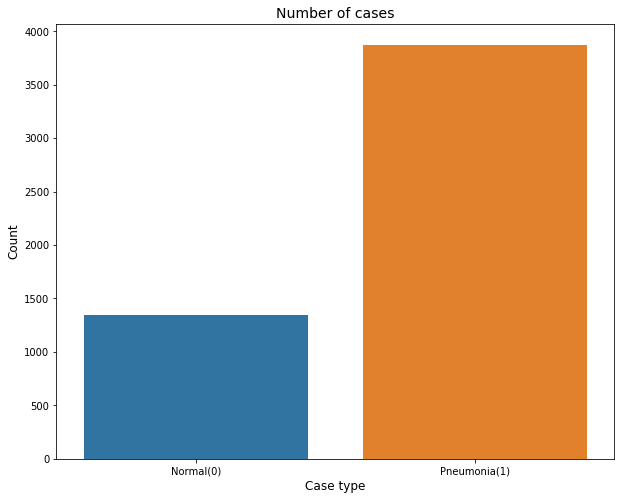

In [8]:
# Get the counts for each class
train_data = pd.DataFrame(training_data, columns=['image', 'label'],index=None)
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

In [9]:
del train_data

In [10]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 1)

## The below code is a way to put validation data into one list if flow_from_directory is not used. This is good for small data sets but impracticle for large ones.

In [11]:
#validation_data
v_data_dir = '/home/jordan/Data/xrays/chest_xray/chest_xray/val'

categories = ['NORMAL', 'PNEUMONIA']


img_size = 125

val_data = []


def create_val_data():
    for category in categories:
        path = os.path.join(v_data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(
                    path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                val_data.append([new_array, class_num])
            except Exception as e:
                pass


create_val_data()


Val_X = []
Val_y = []

for features, label in val_data:
    Val_X.append(features)
    Val_y.append(label)
    
Val_X = np.array(Val_X).reshape(-1, img_size, img_size, 1)

## The below scales the training data

In [12]:
X_n = X/255.0

## The below code is a way to put testing data into one list if flow_from_directory is not used. This is good for small data sets but impracticle for large ones.

In [50]:
data_dir = '/home/jordan/Data/xrays/chest_xray/chest_xray/test'

categories = ['NORMAL', 'PNEUMONIA']


img_size = 125

testing_data = []


def create_testing_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass


create_testing_data()

test_X = []
test_y = []

for features, label in testing_data:
    test_X.append(features)
    test_y.append(label)
    
test_X = np.array(test_X).reshape(-1, img_size, img_size, 3)

# Start the Model Build
Do work here

## Model 2

Do work here

## The below is a baseline model to judge other models off of.

In [7]:
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = .333)
sess = tf.Session(config=tf.ConfigProto(gpu_options = gpu_options))

In [8]:
import time
from keras.callbacks import TensorBoard

In [20]:

NAME = "conv2d_model5_small-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir= 'logs/{}'.format(NAME))

In [93]:

model_5 = Sequential()

#Convolution
model_5.add(Conv2D(64, (3, 3), activation="relu", padding = 'same', input_shape=(125, 125, 1)))

#Pooling & Dropout
model_5.add(MaxPooling2D(pool_size = (2, 2)))


#Convolution
model_5.add(Conv2D(64, (3, 3), activation="relu", padding = 'same', input_shape=(125, 125, 1)))

# Flatten the layer
model_5.add(Flatten())

# Fully Connected Layers
model_5.add(Dense(activation = 'relu', units = 128))
model_5.add(Dense(activation = 'sigmoid', units = 1))

model_5.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics=[km.binary_precision(), km.binary_recall()])

history_cnn_v5 = model_4.fit(X_n, y, validation_data=(Val_X, Val_y), batch_size = 1000, epochs = 3
         , callbacks = [es, reduce_learning_rate, tensorboard])

## The below block plots the predictions in a confusion matrix.  This is a result of the baseline model above with a precision of .62 and recall of .99

<Figure size 432x288 with 0 Axes>

(<Figure size 720x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b0d3442080>)

([<matplotlib.axis.XTick at 0x1b0d345b198>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1b0d3464a58>,
 <a list of 2 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

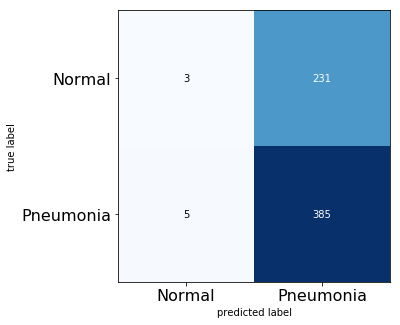

Recall of the model is 0.99
Precision of the model is 0.62


In [96]:
preds = model_5.predict(test_X)
preds = np.squeeze((preds > 0.5).astype('int'))
preds = pd.DataFrame(preds)
test_y = pd.DataFrame(test_y)
orig = test_y.astype('int')

# Get the confusion matrix
cm  = confusion_matrix(orig, preds)
plt.figure()
plot_confusion_matrix(cm,figsize=(10,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()


# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))


## The below code block is a psuedo function that changes the shape upon the flow from directory

In [10]:
img_size = 125
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_size, img_size)
else:
    input_shape = (img_size, img_size, 3)

## The below sets the directories where the test/train/validation sample sets are held.

In [11]:
data_dir = '/home/jordan/Data/xrays/chest_xray/chest_xray/train'
v_data_dir = '/home/jordan/Data/xrays/chest_xray/chest_xray/val'
test_data_dir = '/home/jordan/Data/xrays/chest_xray/chest_xray/test'

epochs = 20
img_size = 125

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=16,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    v_data_dir,
    target_size=(img_size, img_size),
    batch_size=16,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_size, img_size),
    batch_size=16,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Below, we run a plethora of models based on loops that construct different model structures.  

    ### name gives a unique name to each model
    ### tensorboard prints results real time to a tensorboard showing loss and metrics
    ### mcp saves each model
    ### reduce_learning_rate reduces the learning rate after two iterations when loss does not improve. 

In [18]:
dense_layers = [2,3,4]
layer_sizes = [32, 64, 128]elow
con_layers = [2,3, 4]
con_layer_sizes = [32, 64, 128]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in con_layers:
            for con_layer_size in con_layer_sizes:
                
                img_size = 125
                
                batch_size = 16
                
                K.input_shape = (img_size, img_size)
                
                NAME = "{}-conv-{}-con_layer_sizes-{}-nodes-{}-dense-{}".format(conv_layer, con_layer_size, layer_size, dense_layer, int(time.time()))
                print(NAME)
                
                #call backs
                tensorboard = TensorBoard(log_dir= 'logs/{}'.format(NAME))
                
                mcp = ModelCheckpoint(filepath='/home/jordan/Data/xrays/chest_xray/chest_xray/models/'+NAME+'_model.h5',monitor="val_loss"
                                      , save_best_only=True, save_weights_only=False)
                
                reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=2,cooldown=2
                                                         , min_lr=0.00001, verbose=1)
                
                
               
                #start model build
                model = Sequential()
                model.add(Conv2D(con_layer_size, (3, 3), activation="relu", padding = 'same', input_shape=input_shape))
                model.add(MaxPooling2D(pool_size = (2, 2)))
                model.add(BatchNormalization())
                model.add(Dropout(0.15))

                for l in range(conv_layer):
                    #Convolution
                    model.add(Conv2D(con_layer_size, (3, 3), activation="relu", padding = 'same'))
                    model.add(MaxPooling2D(pool_size = (2, 2)))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.15))                
                    
                
                #model.add(GlobalAveragePooling2D())
                # Flatten the layer
                model.add(Flatten())
                
                for l in range(dense_layer):
                    model.add(Dense(layer_size, activation = 'relu'))

                model.add(Dense(activation = 'sigmoid', units = 1))

                model.compile(loss ='binary_crossentropy', optimizer = 'adam'
                              , metrics=[km.binary_precision(), km.binary_recall()])
                
                #generators = Generators(TRAIN_DATA_DIR, VALIDATION_DATA_DIR, TEST_DATA_DIR)
                #train_generator = generators.train_generator(150, batch_size=32)
                #validation_generator = generators.validation_generator(150, batch_size=16)

                model.fit_generator(train_generator, steps_per_epoch=5216  // batch_size
                                    ,validation_data=validation_generator, validation_steps=1
                                    , epochs = 50, callbacks = [reduce_learning_rate, tensorboard, mcp])

2-conv-32-con_layer_sizes-32-nodes-2-dense-1559752227
Epoch 1/50
326/326 [==============================] - 66s 202ms/step - loss: 0.2260 - precision: 0.9367 - recall: 0.9367 - val_loss: 1.7472 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 64s 197ms/step - loss: 0.1757 - precision: 0.9524 - recall: 0.9580 - val_loss: 2.2389 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 65s 200ms/step - loss: 0.1641 - precision: 0.9642 - recall: 0.9569 - val_loss: 1.0368 - val_precision: 0.4615 - val_recall: 0.7500
Epoch 4/50
326/326 [==============================] - 65s 199ms/step - loss: 0.1429 - precision: 0.9658 - recall: 0.9613 - val_loss: 2.3349 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 64s 195ms/step - loss: 0.1319 - precision: 0.9709 - recall: 0.9664 - val_loss: 2.0051 - val_precision: 0.5333 - val_recall: 1.0000

Epoch 00005: ReduceL

326/326 [==============================] - 64s 196ms/step - loss: 0.0589 - precision: 0.9857 - recall: 0.9827 - val_loss: 0.1329 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 64s 196ms/step - loss: 0.0537 - precision: 0.9889 - recall: 0.9879 - val_loss: 0.1448 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 63s 193ms/step - loss: 0.0605 - precision: 0.9860 - recall: 0.9829 - val_loss: 0.1265 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 64s 197ms/step - loss: 0.0590 - precision: 0.9877 - recall: 0.9861 - val_loss: 0.1346 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 64s 198ms/step - loss: 0.0593 - precision: 0.9872 - recall: 0.9844 - val_loss: 0.1464 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 64s 197ms/step - loss: 0.05

2-conv-64-con_layer_sizes-32-nodes-2-dense-1559755468
Epoch 1/50
326/326 [==============================] - 99s 302ms/step - loss: 0.2583 - precision: 0.9255 - recall: 0.9348 - val_loss: 4.7307 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 95s 290ms/step - loss: 0.1920 - precision: 0.9545 - recall: 0.9483 - val_loss: 1.6733 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 95s 290ms/step - loss: 0.1714 - precision: 0.9557 - recall: 0.9569 - val_loss: 4.1193 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 94s 290ms/step - loss: 0.1560 - precision: 0.9567 - recall: 0.9616 - val_loss: 2.2377 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 94s 290ms/step - loss: 0.1208 - precision: 0.9690 - recall: 0.9720 - va

326/326 [==============================] - 94s 289ms/step - loss: 0.0766 - precision: 0.9817 - recall: 0.9802 - val_loss: 1.0025 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 94s 289ms/step - loss: 0.0796 - precision: 0.9803 - recall: 0.9780 - val_loss: 0.9349 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 94s 289ms/step - loss: 0.0741 - precision: 0.9831 - recall: 0.9803 - val_loss: 1.2813 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 94s 289ms/step - loss: 0.0762 - precision: 0.9814 - recall: 0.9817 - val_loss: 1.0746 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 94s 289ms/step - loss: 0.0759 - precision: 0.9812 - recall: 0.9819 - val_loss: 1.0337 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 94s 289ms/step - loss: 0.07

2-conv-128-con_layer_sizes-32-nodes-2-dense-1559760209
Epoch 1/50
326/326 [==============================] - 227s 695ms/step - loss: 0.3040 - precision: 0.9215 - recall: 0.9277 - val_loss: 1.5119 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 225s 690ms/step - loss: 0.2126 - precision: 0.9470 - recall: 0.9431 - val_loss: 1.1551 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 225s 690ms/step - loss: 0.1860 - precision: 0.9540 - recall: 0.9503 - val_loss: 1.2731 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 225s 689ms/step - loss: 0.1720 - precision: 0.9620 - recall: 0.9532 - val_loss: 2.4748 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 225s 690ms/step - loss: 0.1271 - precision: 0.9723 - recall: 0.964

Epoch 43/50
326/326 [==============================] - 225s 691ms/step - loss: 0.0645 - precision: 0.9823 - recall: 0.9841 - val_loss: 0.2221 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 44/50
326/326 [==============================] - 225s 691ms/step - loss: 0.0706 - precision: 0.9836 - recall: 0.9799 - val_loss: 0.3805 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 225s 690ms/step - loss: 0.0679 - precision: 0.9822 - recall: 0.9840 - val_loss: 0.2588 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 46/50
326/326 [==============================] - 225s 690ms/step - loss: 0.0714 - precision: 0.9826 - recall: 0.9803 - val_loss: 0.2147 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 47/50
326/326 [==============================] - 225s 691ms/step - loss: 0.0746 - precision: 0.9821 - recall: 0.9801 - val_loss: 0.2115 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 48/50
326/326 [==============================] - 225s 690ms

3-conv-32-con_layer_sizes-32-nodes-2-dense-1559771480
Epoch 1/50
326/326 [==============================] - 68s 208ms/step - loss: 0.2113 - precision: 0.9384 - recall: 0.9411 - val_loss: 0.9033 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 64s 195ms/step - loss: 0.1632 - precision: 0.9623 - recall: 0.9489 - val_loss: 7.2680 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 67s 206ms/step - loss: 0.1589 - precision: 0.9625 - recall: 0.9538 - val_loss: 7.4098 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 64s 197ms/step - loss: 0.1329 - precision: 0.9663 - recall: 0.9624 - val_loss: 3.5335 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 67s 204ms/step - loss: 0.1223 - precision: 0.9714 - recall: 0.9664 - va

326/326 [==============================] - 63s 194ms/step - loss: 0.0795 - precision: 0.9814 - recall: 0.9791 - val_loss: 0.6317 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 64s 197ms/step - loss: 0.0834 - precision: 0.9776 - recall: 0.9809 - val_loss: 0.3491 - val_precision: 0.8333 - val_recall: 0.6250
Epoch 45/50
326/326 [==============================] - 65s 199ms/step - loss: 0.0802 - precision: 0.9829 - recall: 0.9768 - val_loss: 0.3888 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 64s 197ms/step - loss: 0.0790 - precision: 0.9806 - recall: 0.9822 - val_loss: 0.3196 - val_precision: 0.8571 - val_recall: 0.7500
Epoch 47/50
326/326 [==============================] - 66s 202ms/step - loss: 0.0845 - precision: 0.9822 - recall: 0.9794 - val_loss: 0.3476 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 65s 200ms/step - loss: 0.07

3-conv-64-con_layer_sizes-32-nodes-2-dense-1559774753
Epoch 1/50
326/326 [==============================] - 97s 299ms/step - loss: 0.2210 - precision: 0.9347 - recall: 0.9449 - val_loss: 5.1198 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 96s 295ms/step - loss: 0.1718 - precision: 0.9550 - recall: 0.9552 - val_loss: 3.1529 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 96s 294ms/step - loss: 0.1369 - precision: 0.9692 - recall: 0.9624 - val_loss: 0.4326 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 4/50
326/326 [==============================] - 96s 295ms/step - loss: 0.1297 - precision: 0.9672 - recall: 0.9657 - val_loss: 1.8370 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 96s 294ms/step - loss: 0.1252 - precision: 0.9685 - recall: 0.9698 - val_loss: 0.2726 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 6/50
326/326 [=

326/326 [==============================] - 96s 294ms/step - loss: 0.0620 - precision: 0.9833 - recall: 0.9843 - val_loss: 0.2563 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 96s 294ms/step - loss: 0.0580 - precision: 0.9858 - recall: 0.9853 - val_loss: 0.2619 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 96s 295ms/step - loss: 0.0655 - precision: 0.9802 - recall: 0.9827 - val_loss: 0.2879 - val_precision: 0.8571 - val_recall: 0.7500
Epoch 46/50
326/326 [==============================] - 96s 294ms/step - loss: 0.0603 - precision: 0.9863 - recall: 0.9845 - val_loss: 0.2994 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 96s 295ms/step - loss: 0.0624 - precision: 0.9843 - recall: 0.9859 - val_loss: 0.2652 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 96s 294ms/step - loss: 0.06

3-conv-128-con_layer_sizes-32-nodes-2-dense-1559779578
Epoch 1/50
326/326 [==============================] - 231s 708ms/step - loss: 0.2381 - precision: 0.9313 - recall: 0.9406 - val_loss: 1.8650 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 231s 708ms/step - loss: 0.1844 - precision: 0.9552 - recall: 0.9508 - val_loss: 0.7712 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 229s 701ms/step - loss: 0.1623 - precision: 0.9586 - recall: 0.9576 - val_loss: 0.9076 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 229s 702ms/step - loss: 0.1343 - precision: 0.9679 - recall: 0.9642 - val_loss: 3.3790 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 228s 701ms/step - loss: 0.1113 - precision: 0.9669 - recall: 0.973

Epoch 43/50
326/326 [==============================] - 228s 701ms/step - loss: 0.0600 - precision: 0.9858 - recall: 0.9866 - val_loss: 0.1696 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 228s 700ms/step - loss: 0.0548 - precision: 0.9854 - recall: 0.9872 - val_loss: 0.1745 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 45/50
326/326 [==============================] - 228s 700ms/step - loss: 0.0623 - precision: 0.9847 - recall: 0.9840 - val_loss: 0.1831 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 46/50
326/326 [==============================] - 228s 700ms/step - loss: 0.0524 - precision: 0.9866 - recall: 0.9866 - val_loss: 0.2131 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 228s 700ms/step - loss: 0.0487 - precision: 0.9878 - recall: 0.9875 - val_loss: 0.1980 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 228s 701ms

4-conv-32-con_layer_sizes-32-nodes-2-dense-1559791028
Epoch 1/50
326/326 [==============================] - 69s 211ms/step - loss: 0.2510 - precision: 0.9183 - recall: 0.9472 - val_loss: 0.6698 - val_precision: 0.6250 - val_recall: 0.6250
Epoch 2/50
326/326 [==============================] - 64s 195ms/step - loss: 0.1709 - precision: 0.9524 - recall: 0.9551 - val_loss: 4.7363 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 65s 200ms/step - loss: 0.1574 - precision: 0.9593 - recall: 0.9583 - val_loss: 4.7543 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 64s 197ms/step - loss: 0.1374 - precision: 0.9681 - recall: 0.9613 - val_loss: 1.6777 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 65s 200ms/step - loss: 0.1379 - precision: 0.9667 - recall: 0.9647 - va

326/326 [==============================] - 65s 199ms/step - loss: 0.1033 - precision: 0.9773 - recall: 0.9733 - val_loss: 1.1496 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 66s 201ms/step - loss: 0.1029 - precision: 0.9769 - recall: 0.9719 - val_loss: 1.0332 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 64s 197ms/step - loss: 0.1138 - precision: 0.9722 - recall: 0.9743 - val_loss: 1.0773 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 66s 203ms/step - loss: 0.1032 - precision: 0.9738 - recall: 0.9761 - val_loss: 1.0101 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 66s 204ms/step - loss: 0.1070 - precision: 0.9736 - recall: 0.9716 - val_loss: 0.8258 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 66s 202ms/step - loss: 0.10

4-conv-64-con_layer_sizes-32-nodes-2-dense-1559794300
Epoch 1/50
326/326 [==============================] - 100s 307ms/step - loss: 0.2474 - precision: 0.9245 - recall: 0.9379 - val_loss: 0.8037 - val_precision: 0.5000 - val_recall: 0.2500
Epoch 2/50
326/326 [==============================] - 96s 295ms/step - loss: 0.1602 - precision: 0.9583 - recall: 0.9546 - val_loss: 0.4897 - val_precision: 0.7500 - val_recall: 0.7500
Epoch 3/50
326/326 [==============================] - 96s 295ms/step - loss: 0.1514 - precision: 0.9634 - recall: 0.9599 - val_loss: 0.5293 - val_precision: 0.7000 - val_recall: 0.8750
Epoch 4/50
326/326 [==============================] - 96s 295ms/step - loss: 0.1400 - precision: 0.9683 - recall: 0.9591 - val_loss: 1.0896 - val_precision: 0.5714 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 97s 296ms/step - loss: 0.1183 - precision: 0.9703 - recall: 0.9693 - v

326/326 [==============================] - 96s 296ms/step - loss: 0.0787 - precision: 0.9816 - recall: 0.9773 - val_loss: 0.3562 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 96s 296ms/step - loss: 0.0720 - precision: 0.9798 - recall: 0.9816 - val_loss: 0.2112 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 96s 296ms/step - loss: 0.0705 - precision: 0.9820 - recall: 0.9805 - val_loss: 0.3573 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 96s 296ms/step - loss: 0.0771 - precision: 0.9803 - recall: 0.9800 - val_loss: 0.3267 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 96s 296ms/step - loss: 0.0706 - precision: 0.9813 - recall: 0.9836 - val_loss: 0.1989 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 97s 296ms/step - loss: 0.06

4-conv-128-con_layer_sizes-32-nodes-2-dense-1559799149
Epoch 1/50
326/326 [==============================] - 234s 717ms/step - loss: 0.2327 - precision: 0.9352 - recall: 0.9376 - val_loss: 0.8380 - val_precision: 1.0000 - val_recall: 0.1250
Epoch 2/50
326/326 [==============================] - 230s 705ms/step - loss: 0.1873 - precision: 0.9537 - recall: 0.9529 - val_loss: 1.0617 - val_precision: 0.5000 - val_recall: 0.8750
Epoch 3/50
326/326 [==============================] - 230s 705ms/step - loss: 0.1531 - precision: 0.9652 - recall: 0.9610 - val_loss: 1.7567 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 230s 707ms/step - loss: 0.1283 - precision: 0.9685 - recall: 0.9687 - val_loss: 2.9487 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 229s 704ms/step - loss: 0.1251 - precision: 0.9709 - recall: 0.966

Epoch 43/50
326/326 [==============================] - 230s 705ms/step - loss: 0.0643 - precision: 0.9859 - recall: 0.9813 - val_loss: 0.2214 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 230s 704ms/step - loss: 0.0604 - precision: 0.9853 - recall: 0.9840 - val_loss: 0.3182 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 45/50
326/326 [==============================] - 230s 705ms/step - loss: 0.0645 - precision: 0.9842 - recall: 0.9848 - val_loss: 0.1959 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 46/50
326/326 [==============================] - 229s 704ms/step - loss: 0.0571 - precision: 0.9867 - recall: 0.9856 - val_loss: 0.2058 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 47/50
326/326 [==============================] - 230s 705ms/step - loss: 0.0674 - precision: 0.9838 - recall: 0.9813 - val_loss: 0.1815 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 230s 704ms

2-conv-32-con_layer_sizes-64-nodes-2-dense-1559810670
Epoch 1/50
326/326 [==============================] - 67s 205ms/step - loss: 0.2268 - precision: 0.9357 - recall: 0.9374 - val_loss: 2.7261 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 67s 207ms/step - loss: 0.1714 - precision: 0.9603 - recall: 0.9563 - val_loss: 0.4905 - val_precision: 1.0000 - val_recall: 0.6250
Epoch 3/50
326/326 [==============================] - 64s 196ms/step - loss: 0.1478 - precision: 0.9618 - recall: 0.9601 - val_loss: 0.4506 - val_precision: 0.8571 - val_recall: 0.7500
Epoch 4/50
326/326 [==============================] - 65s 201ms/step - loss: 0.1473 - precision: 0.9647 - recall: 0.9630 - val_loss: 0.5630 - val_precision: 0.6667 - val_recall: 0.7500
Epoch 5/50
326/326 [==============================] - 64s 197ms/step - loss: 0.1317 - precision: 0.9685 - recall: 0.9665 - val_loss: 1.4891 - val_precision: 0.5833 - val_recall: 0.8750

Epoch 00005: ReduceL

326/326 [==============================] - 64s 196ms/step - loss: 0.0614 - precision: 0.9837 - recall: 0.9847 - val_loss: 0.3227 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 44/50
326/326 [==============================] - 65s 200ms/step - loss: 0.0584 - precision: 0.9860 - recall: 0.9855 - val_loss: 0.3296 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 45/50
326/326 [==============================] - 65s 199ms/step - loss: 0.0589 - precision: 0.9858 - recall: 0.9838 - val_loss: 0.3214 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 46/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0602 - precision: 0.9847 - recall: 0.9829 - val_loss: 0.3248 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 47/50
326/326 [==============================] - 64s 198ms/step - loss: 0.0580 - precision: 0.9848 - recall: 0.9833 - val_loss: 0.3384 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 48/50
326/326 [==============================] - 65s 198ms/step - loss: 0.05

2-conv-64-con_layer_sizes-64-nodes-2-dense-1559813938
Epoch 1/50
326/326 [==============================] - 98s 302ms/step - loss: 0.2765 - precision: 0.9256 - recall: 0.9347 - val_loss: 3.2385 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 98s 299ms/step - loss: 0.1940 - precision: 0.9518 - recall: 0.9495 - val_loss: 0.9534 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 95s 290ms/step - loss: 0.1711 - precision: 0.9578 - recall: 0.9602 - val_loss: 0.4918 - val_precision: 0.7000 - val_recall: 0.8750
Epoch 4/50
326/326 [==============================] - 94s 290ms/step - loss: 0.1691 - precision: 0.9590 - recall: 0.9610 - val_loss: 1.1706 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 95s 290ms/step - loss: 0.1463 - precision: 0.9651 - recall: 0.9634 - val_loss: 0.9999 - val_precision: 0.5714 - val_recall: 1.0000

Epoch 00005: ReduceL

326/326 [==============================] - 95s 291ms/step - loss: 0.0744 - precision: 0.9821 - recall: 0.9803 - val_loss: 0.6588 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 95s 291ms/step - loss: 0.0696 - precision: 0.9831 - recall: 0.9818 - val_loss: 0.6042 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 109s 335ms/step - loss: 0.0757 - precision: 0.9800 - recall: 0.9788 - val_loss: 0.6530 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 96s 294ms/step - loss: 0.0743 - precision: 0.9819 - recall: 0.9822 - val_loss: 0.7183 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 96s 294ms/step - loss: 0.0672 - precision: 0.9849 - recall: 0.9836 - val_loss: 0.5010 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 96s 293ms/step - loss: 0.0

2-conv-128-con_layer_sizes-64-nodes-2-dense-1559818732
Epoch 1/50
326/326 [==============================] - 230s 704ms/step - loss: 0.3297 - precision: 0.9226 - recall: 0.9247 - val_loss: 1.9348 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 226s 693ms/step - loss: 0.2407 - precision: 0.9380 - recall: 0.9411 - val_loss: 1.8594 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 226s 694ms/step - loss: 0.1875 - precision: 0.9566 - recall: 0.9571 - val_loss: 1.1026 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 227s 695ms/step - loss: 0.1640 - precision: 0.9617 - recall: 0.9565 - val_loss: 2.0962 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 226s 693ms/step - loss: 0.1502 - precision: 0.9642 - recall: 0.9600 - val_loss: 1.1204 - val_precision: 0.5333 - val_recall: 1.0000

Epoch 00005: R

Epoch 43/50
326/326 [==============================] - 217s 667ms/step - loss: 0.0667 - precision: 0.9816 - recall: 0.9826 - val_loss: 0.2529 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 217s 667ms/step - loss: 0.0691 - precision: 0.9840 - recall: 0.9820 - val_loss: 0.3847 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 218s 668ms/step - loss: 0.0723 - precision: 0.9832 - recall: 0.9807 - val_loss: 0.2079 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 46/50
326/326 [==============================] - 218s 668ms/step - loss: 0.0642 - precision: 0.9867 - recall: 0.9815 - val_loss: 0.1998 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 47/50
326/326 [==============================] - 218s 667ms/step - loss: 0.0692 - precision: 0.9831 - recall: 0.9833 - val_loss: 0.1922 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 48/50
326/326 [==============================] - 218s 667ms

3-conv-32-con_layer_sizes-64-nodes-2-dense-1559829982
Epoch 1/50
326/326 [==============================] - 69s 212ms/step - loss: 0.2311 - precision: 0.9300 - recall: 0.9394 - val_loss: 2.5359 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 68s 207ms/step - loss: 0.1896 - precision: 0.9521 - recall: 0.9507 - val_loss: 0.9707 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 66s 202ms/step - loss: 0.1522 - precision: 0.9635 - recall: 0.9578 - val_loss: 0.8810 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 65s 201ms/step - loss: 0.1366 - precision: 0.9653 - recall: 0.9660 - val_loss: 1.1859 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 65s 199ms/step - loss: 0.1252 - precision: 0.9691 - recall: 0.9646 - val_loss: 3.3619 - val_precision: 0.5333 - val_recall: 1.0000

Epoch 00005: ReduceL

326/326 [==============================] - 65s 199ms/step - loss: 0.0667 - precision: 0.9834 - recall: 0.9844 - val_loss: 0.6426 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 66s 201ms/step - loss: 0.0590 - precision: 0.9860 - recall: 0.9855 - val_loss: 0.4005 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 45/50
326/326 [==============================] - 66s 201ms/step - loss: 0.0682 - precision: 0.9835 - recall: 0.9822 - val_loss: 0.3752 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 46/50
326/326 [==============================] - 65s 199ms/step - loss: 0.0666 - precision: 0.9868 - recall: 0.9812 - val_loss: 0.4985 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 64s 196ms/step - loss: 0.0674 - precision: 0.9814 - recall: 0.9817 - val_loss: 0.6052 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 64s 196ms/step - loss: 0.06

3-conv-64-con_layer_sizes-64-nodes-2-dense-1559833271
Epoch 1/50
326/326 [==============================] - 100s 306ms/step - loss: 0.2259 - precision: 0.9401 - recall: 0.9427 - val_loss: 1.0381 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 96s 296ms/step - loss: 0.1653 - precision: 0.9573 - recall: 0.9573 - val_loss: 0.4713 - val_precision: 0.7500 - val_recall: 0.7500
Epoch 3/50
326/326 [==============================] - 96s 295ms/step - loss: 0.1586 - precision: 0.9612 - recall: 0.9576 - val_loss: 0.6266 - val_precision: 0.6250 - val_recall: 0.6250
Epoch 4/50
326/326 [==============================] - 96s 295ms/step - loss: 0.1329 - precision: 0.9677 - recall: 0.9629 - val_loss: 4.3393 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 96s 295ms/step - loss: 0.1128 - precision: 0.9748 - recall: 0.9700 - v

326/326 [==============================] - 97s 296ms/step - loss: 0.0724 - precision: 0.9826 - recall: 0.9813 - val_loss: 0.1384 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 96s 296ms/step - loss: 0.0609 - precision: 0.9824 - recall: 0.9842 - val_loss: 0.1966 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 45/50
326/326 [==============================] - 96s 296ms/step - loss: 0.0696 - precision: 0.9840 - recall: 0.9809 - val_loss: 0.1445 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 96s 296ms/step - loss: 0.0630 - precision: 0.9853 - recall: 0.9840 - val_loss: 0.1609 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 47/50
326/326 [==============================] - 96s 296ms/step - loss: 0.0604 - precision: 0.9868 - recall: 0.9837 - val_loss: 0.1357 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 97s 296ms/step - loss: 0.06

3-conv-128-con_layer_sizes-64-nodes-2-dense-1559838128
Epoch 1/50
326/326 [==============================] - 231s 709ms/step - loss: 0.2424 - precision: 0.9355 - recall: 0.9343 - val_loss: 0.8073 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
326/326 [==============================] - 228s 699ms/step - loss: 0.1790 - precision: 0.9544 - recall: 0.9549 - val_loss: 0.8417 - val_precision: 0.6000 - val_recall: 0.3750
Epoch 3/50
326/326 [==============================] - 228s 700ms/step - loss: 0.1415 - precision: 0.9648 - recall: 0.9653 - val_loss: 1.4445 - val_precision: 0.5333 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 228s 701ms/step - loss: 0.1104 - precision: 0.9749 - recall: 0.9759 - val_loss: 1.1943 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 228s 699ms/step - loss: 0.1107 - precision: 0.9738 - recal

Epoch 43/50
326/326 [==============================] - 220s 675ms/step - loss: 0.0520 - precision: 0.9863 - recall: 0.9866 - val_loss: 0.1563 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 219s 673ms/step - loss: 0.0503 - precision: 0.9889 - recall: 0.9874 - val_loss: 0.1326 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 220s 674ms/step - loss: 0.0524 - precision: 0.9876 - recall: 0.9874 - val_loss: 0.1220 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 220s 674ms/step - loss: 0.0545 - precision: 0.9878 - recall: 0.9871 - val_loss: 0.1218 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 220s 674ms/step - loss: 0.0486 - precision: 0.9897 - recall: 0.9862 - val_loss: 0.1043 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 220s 674ms

4-conv-32-con_layer_sizes-64-nodes-2-dense-1559849375
Epoch 1/50
326/326 [==============================] - 69s 212ms/step - loss: 0.2498 - precision: 0.9170 - recall: 0.9365 - val_loss: 3.9257 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 68s 208ms/step - loss: 0.1796 - precision: 0.9532 - recall: 0.9487 - val_loss: 0.5930 - val_precision: 1.0000 - val_recall: 0.3750
Epoch 3/50
326/326 [==============================] - 65s 201ms/step - loss: 0.1615 - precision: 0.9626 - recall: 0.9574 - val_loss: 3.0774 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 64s 197ms/step - loss: 0.1470 - precision: 0.9615 - recall: 0.9620 - val_loss: 0.8952 - val_precision: 0.5385 - val_recall: 0.8750

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 63s 194ms/step - loss: 0.1328 - precision: 0.9688 - recall: 0.9621 - va

326/326 [==============================] - 65s 199ms/step - loss: 0.0895 - precision: 0.9768 - recall: 0.9770 - val_loss: 0.8864 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0833 - precision: 0.9796 - recall: 0.9832 - val_loss: 0.7483 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 65s 200ms/step - loss: 0.0912 - precision: 0.9780 - recall: 0.9791 - val_loss: 0.5458 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 66s 202ms/step - loss: 0.0977 - precision: 0.9762 - recall: 0.9760 - val_loss: 0.4966 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 66s 202ms/step - loss: 0.0887 - precision: 0.9794 - recall: 0.9766 - val_loss: 0.7535 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 65s 200ms/step - loss: 0.09

4-conv-64-con_layer_sizes-64-nodes-2-dense-1559852690
Epoch 1/50
326/326 [==============================] - 98s 302ms/step - loss: 0.2447 - precision: 0.9269 - recall: 0.9320 - val_loss: 1.7256 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 100s 306ms/step - loss: 0.1808 - precision: 0.9534 - recall: 0.9514 - val_loss: 1.6338 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 96s 296ms/step - loss: 0.1567 - precision: 0.9612 - recall: 0.9545 - val_loss: 3.7836 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 97s 297ms/step - loss: 0.1407 - precision: 0.9662 - recall: 0.9614 - val_loss: 1.3088 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 97s 296ms/step - loss: 0.1308 - precision: 0.9713 - recall: 0.9658 - val_loss: 2.3869 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 6/50
326/326 [

326/326 [==============================] - 98s 301ms/step - loss: 0.0769 - precision: 0.9779 - recall: 0.9797 - val_loss: 0.4571 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 97s 298ms/step - loss: 0.0679 - precision: 0.9833 - recall: 0.9815 - val_loss: 0.3654 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 98s 300ms/step - loss: 0.0722 - precision: 0.9811 - recall: 0.9814 - val_loss: 0.4529 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 98s 301ms/step - loss: 0.0715 - precision: 0.9834 - recall: 0.9826 - val_loss: 0.6398 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 98s 301ms/step - loss: 0.0735 - precision: 0.9815 - recall: 0.9803 - val_loss: 0.5239 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 97s 298ms/step - loss: 0.06

4-conv-128-con_layer_sizes-64-nodes-2-dense-1559857581
Epoch 1/50
326/326 [==============================] - 233s 715ms/step - loss: 0.2321 - precision: 0.9376 - recall: 0.9446 - val_loss: 0.8277 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 230s 706ms/step - loss: 0.1707 - precision: 0.9544 - recall: 0.9594 - val_loss: 1.9932 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 228s 700ms/step - loss: 0.1547 - precision: 0.9627 - recall: 0.9617 - val_loss: 2.8809 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 228s 699ms/step - loss: 0.1260 - precision: 0.9689 - recall: 0.9669 - val_loss: 0.4433 - val_precision: 0.7000 - val_recall: 0.8750
Epoch 5/50
326/326 [==============================] - 228s 700ms/step - loss: 0.1103 - precision: 0.9720 - recall: 0.973

Epoch 43/50
326/326 [==============================] - 220s 675ms/step - loss: 0.0578 - precision: 0.9863 - recall: 0.9855 - val_loss: 0.3672 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 220s 675ms/step - loss: 0.0581 - precision: 0.9861 - recall: 0.9848 - val_loss: 0.2572 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 220s 674ms/step - loss: 0.0582 - precision: 0.9861 - recall: 0.9856 - val_loss: 0.6712 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 220s 674ms/step - loss: 0.0594 - precision: 0.9855 - recall: 0.9873 - val_loss: 0.3111 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 220s 675ms/step - loss: 0.0600 - precision: 0.9843 - recall: 0.9861 - val_loss: 0.1527 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 220s 675ms

2-conv-32-con_layer_sizes-128-nodes-2-dense-1559868715
Epoch 1/50
326/326 [==============================] - 70s 214ms/step - loss: 0.2392 - precision: 0.9339 - recall: 0.9361 - val_loss: 1.7395 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1737 - precision: 0.9568 - recall: 0.9538 - val_loss: 1.1209 - val_precision: 0.5385 - val_recall: 0.8750
Epoch 3/50
326/326 [==============================] - 65s 200ms/step - loss: 0.1525 - precision: 0.9622 - recall: 0.9577 - val_loss: 0.6472 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 66s 202ms/step - loss: 0.1352 - precision: 0.9663 - recall: 0.9678 - val_loss: 0.5225 - val_precision: 1.0000 - val_recall: 0.6250
Epoch 5/50
326/326 [==============================] - 66s 203ms/step - loss: 0.1264 - precision: 0.9679 - recall: 0.9666 - val_loss: 0.7333 - val_precision: 0.5833 - val_recall: 0.8750
Epoch 6/50
326/326 [

326/326 [==============================] - 66s 203ms/step - loss: 0.0507 - precision: 0.9881 - recall: 0.9866 - val_loss: 0.1054 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 66s 202ms/step - loss: 0.0516 - precision: 0.9850 - recall: 0.9843 - val_loss: 0.0937 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 65s 198ms/step - loss: 0.0539 - precision: 0.9853 - recall: 0.9858 - val_loss: 0.0986 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 65s 200ms/step - loss: 0.0487 - precision: 0.9884 - recall: 0.9863 - val_loss: 0.1019 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0489 - precision: 0.9876 - recall: 0.9879 - val_loss: 0.0819 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 66s 203ms/step - loss: 0.04

2-conv-64-con_layer_sizes-128-nodes-2-dense-1559872051
Epoch 1/50
326/326 [==============================] - 101s 311ms/step - loss: 0.2758 - precision: 0.9298 - recall: 0.9387 - val_loss: 1.9565 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 100s 306ms/step - loss: 0.2016 - precision: 0.9534 - recall: 0.9470 - val_loss: 5.3451 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 97s 296ms/step - loss: 0.1641 - precision: 0.9580 - recall: 0.9577 - val_loss: 1.2746 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 97s 297ms/step - loss: 0.1728 - precision: 0.9597 - recall: 0.9600 - val_loss: 1.7144 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 97s 297ms/step - loss: 0.1419 - precision: 0.9682 - recall: 0.9644 - val_loss: 0.9936 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 6/50
326/326

326/326 [==============================] - 97s 297ms/step - loss: 0.0600 - precision: 0.9876 - recall: 0.9830 - val_loss: 0.6404 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 97s 297ms/step - loss: 0.0601 - precision: 0.9873 - recall: 0.9850 - val_loss: 0.5972 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 97s 297ms/step - loss: 0.0612 - precision: 0.9868 - recall: 0.9832 - val_loss: 0.6094 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 97s 297ms/step - loss: 0.0571 - precision: 0.9861 - recall: 0.9843 - val_loss: 0.7013 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 97s 297ms/step - loss: 0.0580 - precision: 0.9868 - recall: 0.9853 - val_loss: 0.6086 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 97s 297ms/step - loss: 0.06

2-conv-128-con_layer_sizes-128-nodes-2-dense-1559876937
Epoch 1/50
326/326 [==============================] - 232s 711ms/step - loss: 0.3358 - precision: 0.9229 - recall: 0.9219 - val_loss: 2.9450 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 228s 700ms/step - loss: 0.2118 - precision: 0.9478 - recall: 0.9471 - val_loss: 0.3566 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 3/50
326/326 [==============================] - 229s 702ms/step - loss: 0.1736 - precision: 0.9576 - recall: 0.9542 - val_loss: 5.1266 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 229s 701ms/step - loss: 0.1591 - precision: 0.9638 - recall: 0.9566 - val_loss: 1.4491 - val_precision: 0.5333 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 229s 701ms/step - loss: 0.1153 - precision: 0.9758 - recall: 0.96

Epoch 43/50
326/326 [==============================] - 221s 677ms/step - loss: 0.0683 - precision: 0.9847 - recall: 0.9807 - val_loss: 0.3854 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 220s 676ms/step - loss: 0.0758 - precision: 0.9814 - recall: 0.9801 - val_loss: 0.3046 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 221s 677ms/step - loss: 0.0717 - precision: 0.9827 - recall: 0.9807 - val_loss: 0.3176 - val_precision: 0.7000 - val_recall: 0.8750
Epoch 46/50
326/326 [==============================] - 221s 677ms/step - loss: 0.0675 - precision: 0.9853 - recall: 0.9835 - val_loss: 0.3268 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 220s 676ms/step - loss: 0.0656 - precision: 0.9860 - recall: 0.9806 - val_loss: 0.3512 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 221s 677ms

3-conv-32-con_layer_sizes-128-nodes-2-dense-1559888239
Epoch 1/50
326/326 [==============================] - 69s 212ms/step - loss: 0.2311 - precision: 0.9368 - recall: 0.9383 - val_loss: 2.0913 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 66s 204ms/step - loss: 0.1873 - precision: 0.9494 - recall: 0.9491 - val_loss: 1.0142 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 65s 200ms/step - loss: 0.1539 - precision: 0.9617 - recall: 0.9613 - val_loss: 2.2442 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 65s 200ms/step - loss: 0.1497 - precision: 0.9616 - recall: 0.9604 - val_loss: 0.3205 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 65s 200ms/step - loss: 0.1300 - precision: 0.9724 - recall: 0.9668 - val_loss: 1.3342 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 6/50
326/326 [

326/326 [==============================] - 66s 201ms/step - loss: 0.0690 - precision: 0.9843 - recall: 0.9840 - val_loss: 0.6745 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 65s 200ms/step - loss: 0.0706 - precision: 0.9822 - recall: 0.9805 - val_loss: 0.6502 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 66s 201ms/step - loss: 0.0678 - precision: 0.9847 - recall: 0.9837 - val_loss: 0.5621 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 65s 200ms/step - loss: 0.0697 - precision: 0.9823 - recall: 0.9823 - val_loss: 0.6384 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 66s 204ms/step - loss: 0.0735 - precision: 0.9828 - recall: 0.9826 - val_loss: 0.4986 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 66s 202ms/step - loss: 0.07

3-conv-64-con_layer_sizes-128-nodes-2-dense-1559891556
Epoch 1/50
326/326 [==============================] - 98s 301ms/step - loss: 0.2466 - precision: 0.9327 - recall: 0.9334 - val_loss: 2.0831 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 95s 292ms/step - loss: 0.1855 - precision: 0.9511 - recall: 0.9489 - val_loss: 1.1582 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 93s 284ms/step - loss: 0.1505 - precision: 0.9613 - recall: 0.9598 - val_loss: 1.8255 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 93s 284ms/step - loss: 0.1367 - precision: 0.9645 - recall: 0.9667 - val_loss: 0.7386 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 92s 284ms/step - loss: 0.1418 - precision: 0.9646 - recall: 0.9641 - val_loss: 2.2006 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 6/50
326/326 [

326/326 [==============================] - 93s 285ms/step - loss: 0.0559 - precision: 0.9856 - recall: 0.9876 - val_loss: 0.1829 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 93s 285ms/step - loss: 0.0562 - precision: 0.9860 - recall: 0.9853 - val_loss: 0.2732 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 93s 285ms/step - loss: 0.0554 - precision: 0.9861 - recall: 0.9856 - val_loss: 0.2123 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 93s 285ms/step - loss: 0.0532 - precision: 0.9863 - recall: 0.9858 - val_loss: 0.2145 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 93s 285ms/step - loss: 0.0469 - precision: 0.9889 - recall: 0.9884 - val_loss: 0.2104 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 93s 285ms/step - loss: 0.04

3-conv-128-con_layer_sizes-128-nodes-2-dense-1559896273
Epoch 1/50
326/326 [==============================] - 227s 697ms/step - loss: 0.2493 - precision: 0.9304 - recall: 0.9321 - val_loss: 0.4714 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 2/50
326/326 [==============================] - 231s 709ms/step - loss: 0.1921 - precision: 0.9554 - recall: 0.9450 - val_loss: 4.2436 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 220s 676ms/step - loss: 0.1550 - precision: 0.9646 - recall: 0.9591 - val_loss: 0.5081 - val_precision: 0.8750 - val_recall: 0.8750

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 225s 690ms/step - loss: 0.1240 - precision: 0.9719 - recall: 0.9689 - val_loss: 0.8602 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 221s 677ms/step - loss: 0.1138 - precision: 0.9726 - recall: 0.97

Epoch 43/50
326/326 [==============================] - 222s 680ms/step - loss: 0.0619 - precision: 0.9847 - recall: 0.9835 - val_loss: 0.1411 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 222s 681ms/step - loss: 0.0588 - precision: 0.9868 - recall: 0.9832 - val_loss: 0.1437 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 222s 680ms/step - loss: 0.0559 - precision: 0.9886 - recall: 0.9858 - val_loss: 0.1409 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 222s 681ms/step - loss: 0.0489 - precision: 0.9878 - recall: 0.9871 - val_loss: 0.1902 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 222s 681ms/step - loss: 0.0551 - precision: 0.9879 - recall: 0.9864 - val_loss: 0.1652 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 222s 681ms

4-conv-32-con_layer_sizes-128-nodes-2-dense-1559907395
Epoch 1/50
326/326 [==============================] - 68s 209ms/step - loss: 0.2499 - precision: 0.9248 - recall: 0.9315 - val_loss: 0.7647 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 64s 196ms/step - loss: 0.1723 - precision: 0.9511 - recall: 0.9509 - val_loss: 3.9550 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 66s 202ms/step - loss: 0.1631 - precision: 0.9577 - recall: 0.9587 - val_loss: 2.8898 - val_precision: 0.5714 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 65s 200ms/step - loss: 0.1322 - precision: 0.9681 - recall: 0.9663 - val_loss: 0.7504 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 66s 201ms/step - loss: 0.1241 - precision: 0.9678 - recall: 0.9663 - v

326/326 [==============================] - 66s 202ms/step - loss: 0.0932 - precision: 0.9750 - recall: 0.9757 - val_loss: 0.8653 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0969 - precision: 0.9768 - recall: 0.9730 - val_loss: 0.8755 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 66s 203ms/step - loss: 0.1006 - precision: 0.9739 - recall: 0.9757 - val_loss: 0.7990 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 66s 202ms/step - loss: 0.0942 - precision: 0.9735 - recall: 0.9760 - val_loss: 0.8202 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 65s 198ms/step - loss: 0.0963 - precision: 0.9774 - recall: 0.9726 - val_loss: 0.8014 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 66s 203ms/step - loss: 0.09

4-conv-64-con_layer_sizes-128-nodes-2-dense-1559910726
Epoch 1/50
326/326 [==============================] - 102s 314ms/step - loss: 0.2290 - precision: 0.9322 - recall: 0.9380 - val_loss: 1.1009 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 97s 297ms/step - loss: 0.1764 - precision: 0.9508 - recall: 0.9540 - val_loss: 2.2097 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 93s 286ms/step - loss: 0.1569 - precision: 0.9619 - recall: 0.9604 - val_loss: 1.1374 - val_precision: 0.5714 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 97s 297ms/step - loss: 0.1274 - precision: 0.9661 - recall: 0.9671 - val_loss: 1.0462 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 93s 286ms/step - loss: 0.1134 - precision: 0.9716 - recall: 0.9744 - 

326/326 [==============================] - 94s 287ms/step - loss: 0.0727 - precision: 0.9809 - recall: 0.9845 - val_loss: 0.4355 - val_precision: 1.0000 - val_recall: 0.3750
Epoch 44/50
326/326 [==============================] - 94s 287ms/step - loss: 0.0672 - precision: 0.9839 - recall: 0.9829 - val_loss: 0.2833 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 45/50
326/326 [==============================] - 93s 287ms/step - loss: 0.0600 - precision: 0.9844 - recall: 0.9844 - val_loss: 0.6192 - val_precision: 1.0000 - val_recall: 0.3750
Epoch 46/50
326/326 [==============================] - 94s 287ms/step - loss: 0.0714 - precision: 0.9812 - recall: 0.9807 - val_loss: 0.4031 - val_precision: 1.0000 - val_recall: 0.6250
Epoch 47/50
326/326 [==============================] - 93s 287ms/step - loss: 0.0680 - precision: 0.9852 - recall: 0.9808 - val_loss: 0.2860 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 48/50
326/326 [==============================] - 94s 287ms/step - loss: 0.07

4-conv-128-con_layer_sizes-128-nodes-2-dense-1559915461
Epoch 1/50
326/326 [==============================] - 231s 708ms/step - loss: 0.2386 - precision: 0.9302 - recall: 0.9384 - val_loss: 3.9575 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 223s 685ms/step - loss: 0.1846 - precision: 0.9549 - recall: 0.9539 - val_loss: 0.9364 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 221s 678ms/step - loss: 0.1468 - precision: 0.9612 - recall: 0.9641 - val_loss: 4.2823 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 221s 678ms/step - loss: 0.1448 - precision: 0.9667 - recall: 0.9605 - val_loss: 0.8675 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 221s 678ms/step - loss: 0.1298 - precision: 0.9698 - recall: 0.9680 - val_loss: 0.5165 - val_precision: 0.7500 - val_recall: 0.7500
Epoch 6/50
326

Epoch 43/50
326/326 [==============================] - 222s 680ms/step - loss: 0.0565 - precision: 0.9848 - recall: 0.9855 - val_loss: 0.2475 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 44/50
326/326 [==============================] - 222s 680ms/step - loss: 0.0553 - precision: 0.9865 - recall: 0.9852 - val_loss: 0.3293 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 222s 680ms/step - loss: 0.0548 - precision: 0.9874 - recall: 0.9851 - val_loss: 0.2752 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 222s 680ms/step - loss: 0.0559 - precision: 0.9844 - recall: 0.9839 - val_loss: 0.3442 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 222s 681ms/step - loss: 0.0593 - precision: 0.9871 - recall: 0.9853 - val_loss: 0.2330 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 48/50
326/326 [==============================] - 222s 681ms

2-conv-32-con_layer_sizes-32-nodes-3-dense-1559926601
Epoch 1/50
326/326 [==============================] - 67s 205ms/step - loss: 0.2286 - precision: 0.9440 - recall: 0.9307 - val_loss: 1.5650 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 64s 198ms/step - loss: 0.1647 - precision: 0.9595 - recall: 0.9566 - val_loss: 2.3942 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 64s 197ms/step - loss: 0.1557 - precision: 0.9624 - recall: 0.9555 - val_loss: 0.9366 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 66s 201ms/step - loss: 0.1277 - precision: 0.9704 - recall: 0.9644 - val_loss: 1.6799 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 66s 202ms/step - loss: 0.1288 - precision: 0.9690 - recall: 0.9658 - val_loss: 4.9456 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00005: ReduceL

326/326 [==============================] - 66s 203ms/step - loss: 0.0699 - precision: 0.9852 - recall: 0.9822 - val_loss: 0.2286 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 44/50
326/326 [==============================] - 66s 202ms/step - loss: 0.0593 - precision: 0.9858 - recall: 0.9858 - val_loss: 0.2214 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 45/50
326/326 [==============================] - 65s 201ms/step - loss: 0.0689 - precision: 0.9848 - recall: 0.9828 - val_loss: 0.2021 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 66s 201ms/step - loss: 0.0730 - precision: 0.9829 - recall: 0.9829 - val_loss: 0.2127 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0651 - precision: 0.9829 - recall: 0.9846 - val_loss: 0.2083 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 48/50
326/326 [==============================] - 66s 201ms/step - loss: 0.06

2-conv-64-con_layer_sizes-32-nodes-3-dense-1559929923
Epoch 1/50
326/326 [==============================] - 100s 307ms/step - loss: 0.2428 - precision: 0.9308 - recall: 0.9373 - val_loss: 0.8602 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 98s 299ms/step - loss: 0.1824 - precision: 0.9540 - recall: 0.9518 - val_loss: 0.6760 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 95s 290ms/step - loss: 0.1786 - precision: 0.9546 - recall: 0.9551 - val_loss: 3.3204 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 95s 290ms/step - loss: 0.1564 - precision: 0.9644 - recall: 0.9649 - val_loss: 3.6266 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 95s 291ms/step - loss: 0.1238 - precision: 0.9713 - recall: 0.9648 - v

326/326 [==============================] - 95s 292ms/step - loss: 0.0742 - precision: 0.9828 - recall: 0.9790 - val_loss: 0.6963 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 95s 291ms/step - loss: 0.0715 - precision: 0.9837 - recall: 0.9794 - val_loss: 1.1240 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 95s 291ms/step - loss: 0.0629 - precision: 0.9835 - recall: 0.9858 - val_loss: 0.6304 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 95s 292ms/step - loss: 0.0714 - precision: 0.9835 - recall: 0.9820 - val_loss: 0.5524 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 95s 292ms/step - loss: 0.0696 - precision: 0.9822 - recall: 0.9811 - val_loss: 0.7017 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 95s 292ms/step - loss: 0.06

2-conv-128-con_layer_sizes-32-nodes-3-dense-1559934732
Epoch 1/50
326/326 [==============================] - 229s 703ms/step - loss: 0.2965 - precision: 0.9222 - recall: 0.9324 - val_loss: 1.9658 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 224s 687ms/step - loss: 0.2086 - precision: 0.9522 - recall: 0.9426 - val_loss: 0.8881 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 223s 686ms/step - loss: 0.1693 - precision: 0.9590 - recall: 0.9582 - val_loss: 0.3777 - val_precision: 1.0000 - val_recall: 0.6250
Epoch 4/50
326/326 [==============================] - 223s 685ms/step - loss: 0.1578 - precision: 0.9610 - recall: 0.9563 - val_loss: 0.1614 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 5/50
326/326 [==============================] - 223s 684ms/step - loss: 0.1344 - precision: 0.9676 - recall: 0.9631 - val_loss: 1.6523 - val_precision: 0.5455 - val_recall: 0.7500
Epoch 6/50
326/

Epoch 43/50
326/326 [==============================] - 225s 689ms/step - loss: 0.0787 - precision: 0.9814 - recall: 0.9781 - val_loss: 0.2802 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 224s 687ms/step - loss: 0.0775 - precision: 0.9802 - recall: 0.9797 - val_loss: 0.1445 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 225s 690ms/step - loss: 0.0682 - precision: 0.9845 - recall: 0.9829 - val_loss: 0.1400 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 225s 690ms/step - loss: 0.0760 - precision: 0.9817 - recall: 0.9802 - val_loss: 0.1620 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 225s 689ms/step - loss: 0.0659 - precision: 0.9848 - recall: 0.9838 - val_loss: 0.1284 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 225s 689ms

3-conv-32-con_layer_sizes-32-nodes-3-dense-1559945723
Epoch 1/50
326/326 [==============================] - 69s 212ms/step - loss: 0.2182 - precision: 0.9315 - recall: 0.9440 - val_loss: 5.0884 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 67s 204ms/step - loss: 0.1761 - precision: 0.9565 - recall: 0.9563 - val_loss: 0.6425 - val_precision: 0.7500 - val_recall: 0.3750
Epoch 3/50
326/326 [==============================] - 66s 203ms/step - loss: 0.1360 - precision: 0.9667 - recall: 0.9619 - val_loss: 3.1854 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 66s 203ms/step - loss: 0.1467 - precision: 0.9578 - recall: 0.9601 - val_loss: 0.4959 - val_precision: 0.6364 - val_recall: 0.8750
Epoch 5/50
326/326 [==============================] - 66s 204ms/step - loss: 0.1353 - precision: 0.9662 - recall: 0.9647 - val_loss: 2.8393 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 6/50
326/326 [=

326/326 [==============================] - 65s 201ms/step - loss: 0.0690 - precision: 0.9814 - recall: 0.9804 - val_loss: 0.2193 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 66s 202ms/step - loss: 0.0786 - precision: 0.9797 - recall: 0.9802 - val_loss: 0.3546 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 66s 204ms/step - loss: 0.0771 - precision: 0.9809 - recall: 0.9799 - val_loss: 0.2834 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 66s 201ms/step - loss: 0.0664 - precision: 0.9812 - recall: 0.9843 - val_loss: 0.2296 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 47/50
326/326 [==============================] - 66s 202ms/step - loss: 0.0816 - precision: 0.9799 - recall: 0.9799 - val_loss: 0.3354 - val_precision: 1.0000 - val_recall: 0.6250
Epoch 48/50
326/326 [==============================] - 67s 204ms/step - loss: 0.06

3-conv-64-con_layer_sizes-32-nodes-3-dense-1559949076
Epoch 1/50
326/326 [==============================] - 101s 309ms/step - loss: 0.2200 - precision: 0.9347 - recall: 0.9398 - val_loss: 2.5230 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 100s 306ms/step - loss: 0.1719 - precision: 0.9566 - recall: 0.9566 - val_loss: 1.9820 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 97s 297ms/step - loss: 0.1588 - precision: 0.9639 - recall: 0.9568 - val_loss: 0.4677 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 4/50
326/326 [==============================] - 97s 297ms/step - loss: 0.1364 - precision: 0.9652 - recall: 0.9655 - val_loss: 0.9509 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 97s 296ms/step - loss: 0.1338 - precision: 0.9706 - recall: 0.9692 - val_loss: 0.3274 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 6/50
326/326 

326/326 [==============================] - 93s 286ms/step - loss: 0.0598 - precision: 0.9844 - recall: 0.9854 - val_loss: 0.2192 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 93s 285ms/step - loss: 0.0612 - precision: 0.9860 - recall: 0.9827 - val_loss: 0.2799 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 93s 286ms/step - loss: 0.0654 - precision: 0.9825 - recall: 0.9860 - val_loss: 0.1845 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 93s 285ms/step - loss: 0.0570 - precision: 0.9869 - recall: 0.9844 - val_loss: 0.2222 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 93s 286ms/step - loss: 0.0709 - precision: 0.9830 - recall: 0.9825 - val_loss: 0.3278 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 93s 286ms/step - loss: 0.05

3-conv-128-con_layer_sizes-32-nodes-3-dense-1559953918
Epoch 1/50
326/326 [==============================] - 231s 709ms/step - loss: 0.2380 - precision: 0.9326 - recall: 0.9369 - val_loss: 1.5547 - val_precision: 1.0000 - val_recall: 0.1250
Epoch 2/50
326/326 [==============================] - 227s 696ms/step - loss: 0.1838 - precision: 0.9585 - recall: 0.9524 - val_loss: 3.0941 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 220s 676ms/step - loss: 0.1612 - precision: 0.9635 - recall: 0.9578 - val_loss: 1.5475 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 219s 671ms/step - loss: 0.1498 - precision: 0.9642 - recall: 0.9590 - val_loss: 1.6348 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 219s 671ms/step - loss: 0.1364 - precision: 0.9684 - recall: 0.9621 - val_loss: 2.3258 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00005: R

Epoch 43/50
326/326 [==============================] - 220s 676ms/step - loss: 0.0639 - precision: 0.9834 - recall: 0.9844 - val_loss: 0.1625 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 228s 700ms/step - loss: 0.0619 - precision: 0.9844 - recall: 0.9847 - val_loss: 0.1524 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 229s 701ms/step - loss: 0.0576 - precision: 0.9876 - recall: 0.9833 - val_loss: 0.1885 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 229s 702ms/step - loss: 0.0631 - precision: 0.9868 - recall: 0.9848 - val_loss: 0.2074 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 230s 704ms/step - loss: 0.0572 - precision: 0.9851 - recall: 0.9859 - val_loss: 0.2053 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 230s 706ms

4-conv-32-con_layer_sizes-32-nodes-3-dense-1559965038
Epoch 1/50
326/326 [==============================] - 70s 215ms/step - loss: 0.2596 - precision: 0.9173 - recall: 0.9273 - val_loss: 5.0661 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 68s 210ms/step - loss: 0.1893 - precision: 0.9510 - recall: 0.9488 - val_loss: 4.3040 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 68s 208ms/step - loss: 0.1697 - precision: 0.9544 - recall: 0.9572 - val_loss: 3.2037 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 67s 204ms/step - loss: 0.1598 - precision: 0.9605 - recall: 0.9630 - val_loss: 0.9266 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1542 - precision: 0.9615 - recall: 0.9585 - val_loss: 0.7811 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 6/50
326/326 [=

326/326 [==============================] - 67s 205ms/step - loss: 0.0915 - precision: 0.9764 - recall: 0.9776 - val_loss: 0.4302 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 67s 206ms/step - loss: 0.0839 - precision: 0.9803 - recall: 0.9778 - val_loss: 0.7125 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 67s 204ms/step - loss: 0.0835 - precision: 0.9781 - recall: 0.9809 - val_loss: 0.5446 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 67s 205ms/step - loss: 0.0897 - precision: 0.9783 - recall: 0.9768 - val_loss: 0.5663 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 67s 205ms/step - loss: 0.0873 - precision: 0.9786 - recall: 0.9776 - val_loss: 0.6429 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 67s 207ms/step - loss: 0.08

4-conv-64-con_layer_sizes-32-nodes-3-dense-1559968452
Epoch 1/50
326/326 [==============================] - 103s 317ms/step - loss: 0.2380 - precision: 0.9358 - recall: 0.9274 - val_loss: 1.5157 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 98s 300ms/step - loss: 0.1831 - precision: 0.9543 - recall: 0.9511 - val_loss: 0.7755 - val_precision: 0.5455 - val_recall: 0.7500
Epoch 3/50
326/326 [==============================] - 98s 300ms/step - loss: 0.1529 - precision: 0.9631 - recall: 0.9586 - val_loss: 1.5548 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 97s 299ms/step - loss: 0.1326 - precision: 0.9658 - recall: 0.9658 - val_loss: 0.4787 - val_precision: 0.8571 - val_recall: 0.7500
Epoch 5/50
326/326 [==============================] - 98s 300ms/step - loss: 0.1388 - precision: 0.9664 - recall: 0.9646 - val_loss: 1.7983 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 6/50
326/326 [

326/326 [==============================] - 98s 301ms/step - loss: 0.0703 - precision: 0.9816 - recall: 0.9816 - val_loss: 0.2264 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 98s 301ms/step - loss: 0.0598 - precision: 0.9854 - recall: 0.9862 - val_loss: 0.1972 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 98s 301ms/step - loss: 0.0696 - precision: 0.9813 - recall: 0.9816 - val_loss: 0.2089 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 98s 301ms/step - loss: 0.0715 - precision: 0.9833 - recall: 0.9805 - val_loss: 0.3660 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 98s 301ms/step - loss: 0.0674 - precision: 0.9819 - recall: 0.9835 - val_loss: 0.2134 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 48/50
326/326 [==============================] - 98s 301ms/step - loss: 0.07

4-conv-128-con_layer_sizes-32-nodes-3-dense-1559973424
Epoch 1/50
326/326 [==============================] - 235s 720ms/step - loss: 0.2235 - precision: 0.9387 - recall: 0.9356 - val_loss: 3.0975 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 233s 713ms/step - loss: 0.1666 - precision: 0.9550 - recall: 0.9579 - val_loss: 3.5247 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 231s 707ms/step - loss: 0.1430 - precision: 0.9675 - recall: 0.9622 - val_loss: 1.5695 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 230s 707ms/step - loss: 0.1504 - precision: 0.9636 - recall: 0.9604 - val_loss: 0.8698 - val_precision: 1.0000 - val_recall: 0.1250
Epoch 5/50
326/326 [==============================] - 230s 706ms/step - loss: 0.1321 - precision: 0.9676 - recall: 0.9679 - val_loss: 2.6467 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 6/50
326/

Epoch 43/50
326/326 [==============================] - 231s 708ms/step - loss: 0.0653 - precision: 0.9833 - recall: 0.9855 - val_loss: 0.2391 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 230s 707ms/step - loss: 0.0658 - precision: 0.9831 - recall: 0.9831 - val_loss: 0.2853 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 231s 707ms/step - loss: 0.0561 - precision: 0.9869 - recall: 0.9851 - val_loss: 0.2553 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 231s 708ms/step - loss: 0.0607 - precision: 0.9835 - recall: 0.9843 - val_loss: 0.2630 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 231s 707ms/step - loss: 0.0561 - precision: 0.9848 - recall: 0.9874 - val_loss: 0.2731 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 231s 708ms

2-conv-32-con_layer_sizes-64-nodes-3-dense-1559985023
Epoch 1/50
326/326 [==============================] - 71s 219ms/step - loss: 0.2393 - precision: 0.9280 - recall: 0.9343 - val_loss: 0.8795 - val_precision: 0.5385 - val_recall: 0.8750
Epoch 2/50
326/326 [==============================] - 68s 209ms/step - loss: 0.1611 - precision: 0.9601 - recall: 0.9618 - val_loss: 1.7322 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 67s 204ms/step - loss: 0.1529 - precision: 0.9571 - recall: 0.9608 - val_loss: 0.3899 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 66s 202ms/step - loss: 0.1404 - precision: 0.9637 - recall: 0.9659 - val_loss: 0.3657 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 67s 204ms/step - loss: 0.1285 - precision: 0.9677 - recall: 0.9682 - val_loss: 0.4093 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 6/50
326/326 [=

326/326 [==============================] - 67s 205ms/step - loss: 0.0634 - precision: 0.9839 - recall: 0.9834 - val_loss: 0.6338 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 67s 204ms/step - loss: 0.0597 - precision: 0.9851 - recall: 0.9848 - val_loss: 0.9701 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 67s 206ms/step - loss: 0.0586 - precision: 0.9854 - recall: 0.9849 - val_loss: 0.6101 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0619 - precision: 0.9849 - recall: 0.9844 - val_loss: 0.9146 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 67s 206ms/step - loss: 0.0683 - precision: 0.9822 - recall: 0.9819 - val_loss: 0.7412 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 67s 205ms/step - loss: 0.05

2-conv-64-con_layer_sizes-64-nodes-3-dense-1559988423
Epoch 1/50
326/326 [==============================] - 100s 307ms/step - loss: 0.2598 - precision: 0.9303 - recall: 0.9303 - val_loss: 5.3456 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 99s 303ms/step - loss: 0.1846 - precision: 0.9557 - recall: 0.9483 - val_loss: 2.9902 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 96s 295ms/step - loss: 0.1661 - precision: 0.9614 - recall: 0.9592 - val_loss: 1.8016 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
326/326 [==============================] - 96s 296ms/step - loss: 0.1503 - precision: 0.9626 - recall: 0.9619 - val_loss: 5.6427 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 96s 296ms/step - loss: 0.1400 - precision: 0.9630 - recall: 0.9632 - val_loss: 0.4754 - val_precision: 0.6364 - val_recall: 0.8750
Epoch 6/50
3

326/326 [==============================] - 93s 284ms/step - loss: 0.0690 - precision: 0.9849 - recall: 0.9839 - val_loss: 0.4299 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 93s 284ms/step - loss: 0.0650 - precision: 0.9854 - recall: 0.9828 - val_loss: 0.6190 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 92s 284ms/step - loss: 0.0762 - precision: 0.9809 - recall: 0.9791 - val_loss: 0.4097 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 93s 284ms/step - loss: 0.0691 - precision: 0.9837 - recall: 0.9814 - val_loss: 0.4973 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 92s 284ms/step - loss: 0.0678 - precision: 0.9850 - recall: 0.9812 - val_loss: 0.4647 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 93s 284ms/step - loss: 0.06

2-conv-128-con_layer_sizes-64-nodes-3-dense-1559993278
Epoch 1/50
326/326 [==============================] - 223s 683ms/step - loss: 0.3216 - precision: 0.9166 - recall: 0.9284 - val_loss: 4.7800 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 219s 672ms/step - loss: 0.2090 - precision: 0.9451 - recall: 0.9421 - val_loss: 0.3268 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 3/50
326/326 [==============================] - 218s 667ms/step - loss: 0.1726 - precision: 0.9567 - recall: 0.9589 - val_loss: 0.6138 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 218s 668ms/step - loss: 0.1572 - precision: 0.9609 - recall: 0.9589 - val_loss: 2.3152 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 218s 670ms/step - loss: 0.1268 - precision: 0.9662 - recall: 0.970

Epoch 43/50
326/326 [==============================] - 217s 666ms/step - loss: 0.0650 - precision: 0.9844 - recall: 0.9826 - val_loss: 0.2110 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 217s 666ms/step - loss: 0.0736 - precision: 0.9822 - recall: 0.9807 - val_loss: 0.3434 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 217s 666ms/step - loss: 0.0670 - precision: 0.9824 - recall: 0.9821 - val_loss: 0.1997 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 217s 666ms/step - loss: 0.0591 - precision: 0.9869 - recall: 0.9839 - val_loss: 0.1936 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 217s 666ms/step - loss: 0.0745 - precision: 0.9818 - recall: 0.9810 - val_loss: 0.2044 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 217s 667ms

3-conv-32-con_layer_sizes-64-nodes-3-dense-1560004240
Epoch 1/50
326/326 [==============================] - 68s 210ms/step - loss: 0.2178 - precision: 0.9388 - recall: 0.9359 - val_loss: 0.6794 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 66s 201ms/step - loss: 0.1570 - precision: 0.9617 - recall: 0.9587 - val_loss: 2.5715 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 65s 200ms/step - loss: 0.1516 - precision: 0.9632 - recall: 0.9630 - val_loss: 2.3463 - val_precision: 0.5333 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 65s 201ms/step - loss: 0.1179 - precision: 0.9704 - recall: 0.9709 - val_loss: 1.0956 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 64s 198ms/step - loss: 0.1149 - precision: 0.9738 - recall: 0.9723 - va

326/326 [==============================] - 66s 202ms/step - loss: 0.0657 - precision: 0.9824 - recall: 0.9830 - val_loss: 0.2084 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 44/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0590 - precision: 0.9850 - recall: 0.9865 - val_loss: 0.1988 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 45/50
326/326 [==============================] - 66s 202ms/step - loss: 0.0645 - precision: 0.9850 - recall: 0.9835 - val_loss: 0.2010 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 46/50
326/326 [==============================] - 65s 201ms/step - loss: 0.0577 - precision: 0.9872 - recall: 0.9842 - val_loss: 0.1980 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 47/50
326/326 [==============================] - 65s 199ms/step - loss: 0.0653 - precision: 0.9845 - recall: 0.9845 - val_loss: 0.1885 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 48/50
326/326 [==============================] - 66s 204ms/step - loss: 0.06

3-conv-64-con_layer_sizes-64-nodes-3-dense-1560007591
Epoch 1/50
326/326 [==============================] - 100s 305ms/step - loss: 0.2258 - precision: 0.9344 - recall: 0.9344 - val_loss: 1.0781 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 98s 299ms/step - loss: 0.1496 - precision: 0.9641 - recall: 0.9623 - val_loss: 0.6563 - val_precision: 0.6667 - val_recall: 0.2500
Epoch 3/50
326/326 [==============================] - 94s 288ms/step - loss: 0.1397 - precision: 0.9652 - recall: 0.9664 - val_loss: 0.4248 - val_precision: 1.0000 - val_recall: 0.6250
Epoch 4/50
326/326 [==============================] - 93s 285ms/step - loss: 0.1468 - precision: 0.9647 - recall: 0.9620 - val_loss: 0.5069 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 93s 285ms/step - loss: 0.1276 - precision: 0.9700 - recall: 0.9647 - val_loss: 0.6360 - val_precision: 0.6667 - val_recall: 1.0000

Epoch 00005: Reduce

326/326 [==============================] - 93s 286ms/step - loss: 0.0670 - precision: 0.9857 - recall: 0.9829 - val_loss: 0.3441 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 44/50
326/326 [==============================] - 93s 286ms/step - loss: 0.0629 - precision: 0.9827 - recall: 0.9855 - val_loss: 0.4182 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 45/50
326/326 [==============================] - 93s 285ms/step - loss: 0.0685 - precision: 0.9830 - recall: 0.9838 - val_loss: 0.3156 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 46/50
326/326 [==============================] - 93s 286ms/step - loss: 0.0632 - precision: 0.9840 - recall: 0.9825 - val_loss: 0.3477 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 47/50
326/326 [==============================] - 93s 286ms/step - loss: 0.0642 - precision: 0.9844 - recall: 0.9832 - val_loss: 0.4992 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 93s 286ms/step - loss: 0.06

3-conv-128-con_layer_sizes-64-nodes-3-dense-1560012331
Epoch 1/50
326/326 [==============================] - 229s 703ms/step - loss: 0.2357 - precision: 0.9338 - recall: 0.9433 - val_loss: 2.3654 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 223s 684ms/step - loss: 0.1913 - precision: 0.9529 - recall: 0.9467 - val_loss: 0.5820 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 219s 672ms/step - loss: 0.1533 - precision: 0.9607 - recall: 0.9564 - val_loss: 2.4276 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 219s 672ms/step - loss: 0.1373 - precision: 0.9677 - recall: 0.9618 - val_loss: 4.7715 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 221s 679ms/step - loss: 0.1115 - precision: 0.9744 - recall: 0.970

Epoch 43/50
326/326 [==============================] - 220s 676ms/step - loss: 0.0437 - precision: 0.9894 - recall: 0.9894 - val_loss: 0.2426 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 220s 675ms/step - loss: 0.0500 - precision: 0.9876 - recall: 0.9876 - val_loss: 0.1560 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 45/50
326/326 [==============================] - 220s 676ms/step - loss: 0.0464 - precision: 0.9899 - recall: 0.9879 - val_loss: 0.1537 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 221s 676ms/step - loss: 0.0476 - precision: 0.9896 - recall: 0.9868 - val_loss: 0.1627 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 220s 676ms/step - loss: 0.0458 - precision: 0.9890 - recall: 0.9867 - val_loss: 0.1270 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 220s 676ms

4-conv-32-con_layer_sizes-64-nodes-3-dense-1560023416
Epoch 1/50
326/326 [==============================] - 72s 220ms/step - loss: 0.2525 - precision: 0.9253 - recall: 0.9305 - val_loss: 4.0228 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 64s 197ms/step - loss: 0.1848 - precision: 0.9508 - recall: 0.9518 - val_loss: 2.4527 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 66s 202ms/step - loss: 0.1748 - precision: 0.9549 - recall: 0.9554 - val_loss: 2.4903 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1655 - precision: 0.9591 - recall: 0.9571 - val_loss: 1.8896 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 65s 201ms/step - loss: 0.1411 - precision: 0.9656 - recall: 0.9646 - val_loss: 1.8553 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 6/50
326/326 [=

326/326 [==============================] - 67s 206ms/step - loss: 0.0914 - precision: 0.9793 - recall: 0.9722 - val_loss: 0.6523 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0798 - precision: 0.9831 - recall: 0.9796 - val_loss: 0.6972 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 67s 205ms/step - loss: 0.0864 - precision: 0.9781 - recall: 0.9791 - val_loss: 0.7059 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0904 - precision: 0.9775 - recall: 0.9790 - val_loss: 0.6508 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0864 - precision: 0.9777 - recall: 0.9782 - val_loss: 0.6330 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 66s 204ms/step - loss: 0.08

4-conv-64-con_layer_sizes-64-nodes-3-dense-1560026798
Epoch 1/50
326/326 [==============================] - 103s 316ms/step - loss: 0.2305 - precision: 0.9300 - recall: 0.9413 - val_loss: 0.7448 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 97s 299ms/step - loss: 0.1624 - precision: 0.9600 - recall: 0.9576 - val_loss: 2.7509 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 94s 287ms/step - loss: 0.1661 - precision: 0.9605 - recall: 0.9595 - val_loss: 0.7452 - val_precision: 0.6667 - val_recall: 0.7500

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 95s 292ms/step - loss: 0.1207 - precision: 0.9690 - recall: 0.9677 - val_loss: 0.4842 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 5/50
326/326 [==============================] - 94s 288ms/step - loss: 0.1164 - precision: 0.9700 - recall: 0.9718 - v

326/326 [==============================] - 94s 288ms/step - loss: 0.0842 - precision: 0.9774 - recall: 0.9794 - val_loss: 0.5692 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 94s 288ms/step - loss: 0.0720 - precision: 0.9826 - recall: 0.9821 - val_loss: 0.7952 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 94s 289ms/step - loss: 0.0728 - precision: 0.9829 - recall: 0.9821 - val_loss: 0.9328 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 94s 289ms/step - loss: 0.0823 - precision: 0.9795 - recall: 0.9820 - val_loss: 0.5555 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 94s 289ms/step - loss: 0.0745 - precision: 0.9814 - recall: 0.9822 - val_loss: 0.6352 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 94s 289ms/step - loss: 0.07

4-conv-128-con_layer_sizes-64-nodes-3-dense-1560031644
Epoch 1/50
326/326 [==============================] - 228s 699ms/step - loss: 0.2292 - precision: 0.9389 - recall: 0.9300 - val_loss: 0.6727 - val_precision: 0.6364 - val_recall: 0.8750
Epoch 2/50
326/326 [==============================] - 230s 704ms/step - loss: 0.1870 - precision: 0.9510 - recall: 0.9522 - val_loss: 0.5232 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 222s 681ms/step - loss: 0.1413 - precision: 0.9660 - recall: 0.9614 - val_loss: 1.1617 - val_precision: 0.5000 - val_recall: 0.8750
Epoch 4/50
326/326 [==============================] - 222s 681ms/step - loss: 0.1409 - precision: 0.9672 - recall: 0.9647 - val_loss: 0.8944 - val_precision: 0.5714 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 223s 685ms/step - loss: 0.1171 - precision: 0.9752 - recall: 0.968

Epoch 43/50
326/326 [==============================] - 223s 683ms/step - loss: 0.0696 - precision: 0.9820 - recall: 0.9810 - val_loss: 0.5905 - val_precision: 0.5833 - val_recall: 0.8750
Epoch 44/50
326/326 [==============================] - 222s 682ms/step - loss: 0.0621 - precision: 0.9825 - recall: 0.9840 - val_loss: 0.4526 - val_precision: 0.7000 - val_recall: 0.8750
Epoch 45/50
326/326 [==============================] - 222s 682ms/step - loss: 0.0635 - precision: 0.9851 - recall: 0.9828 - val_loss: 0.4456 - val_precision: 0.7000 - val_recall: 0.8750
Epoch 46/50
326/326 [==============================] - 223s 683ms/step - loss: 0.0639 - precision: 0.9813 - recall: 0.9846 - val_loss: 0.5967 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 223s 683ms/step - loss: 0.0629 - precision: 0.9827 - recall: 0.9847 - val_loss: 0.3597 - val_precision: 0.7000 - val_recall: 0.8750
Epoch 48/50
326/326 [==============================] - 222s 682ms

2-conv-32-con_layer_sizes-128-nodes-3-dense-1560042865
Epoch 1/50
326/326 [==============================] - 71s 218ms/step - loss: 0.2399 - precision: 0.9361 - recall: 0.9385 - val_loss: 1.8734 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 68s 209ms/step - loss: 0.1694 - precision: 0.9563 - recall: 0.9539 - val_loss: 0.5940 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1555 - precision: 0.9625 - recall: 0.9608 - val_loss: 0.7716 - val_precision: 0.7500 - val_recall: 0.3750
Epoch 4/50
326/326 [==============================] - 67s 204ms/step - loss: 0.1449 - precision: 0.9685 - recall: 0.9613 - val_loss: 5.5978 - val_precision: 0.5714 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 66s 204ms/step - loss: 0.1103 - precision: 0.9764 - recall: 0.9697 - v

326/326 [==============================] - 66s 202ms/step - loss: 0.0650 - precision: 0.9833 - recall: 0.9812 - val_loss: 0.1759 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0651 - precision: 0.9848 - recall: 0.9823 - val_loss: 0.1017 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0570 - precision: 0.9861 - recall: 0.9846 - val_loss: 0.1430 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 67s 206ms/step - loss: 0.0623 - precision: 0.9867 - recall: 0.9821 - val_loss: 0.1085 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 67s 205ms/step - loss: 0.0605 - precision: 0.9851 - recall: 0.9864 - val_loss: 0.1008 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 68s 207ms/step - loss: 0.06

2-conv-64-con_layer_sizes-128-nodes-3-dense-1560046272
Epoch 1/50
326/326 [==============================] - 99s 303ms/step - loss: 0.2569 - precision: 0.9363 - recall: 0.9394 - val_loss: 0.8324 - val_precision: 0.5833 - val_recall: 0.8750
Epoch 2/50
326/326 [==============================] - 101s 308ms/step - loss: 0.1880 - precision: 0.9550 - recall: 0.9528 - val_loss: 4.4529 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 94s 288ms/step - loss: 0.1622 - precision: 0.9604 - recall: 0.9587 - val_loss: 0.4900 - val_precision: 0.6667 - val_recall: 0.7500
Epoch 4/50
326/326 [==============================] - 94s 288ms/step - loss: 0.1402 - precision: 0.9684 - recall: 0.9624 - val_loss: 0.4901 - val_precision: 0.8333 - val_recall: 0.6250
Epoch 5/50
326/326 [==============================] - 94s 288ms/step - loss: 0.1435 - precision: 0.9649 - recall: 0.9634 - val_loss: 2.5662 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00005: Reduc

326/326 [==============================] - 94s 289ms/step - loss: 0.0539 - precision: 0.9870 - recall: 0.9852 - val_loss: 0.1261 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 94s 289ms/step - loss: 0.0611 - precision: 0.9844 - recall: 0.9844 - val_loss: 0.1316 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 94s 289ms/step - loss: 0.0588 - precision: 0.9873 - recall: 0.9833 - val_loss: 0.1665 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 94s 289ms/step - loss: 0.0514 - precision: 0.9894 - recall: 0.9861 - val_loss: 0.1316 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 94s 289ms/step - loss: 0.0617 - precision: 0.9865 - recall: 0.9832 - val_loss: 0.1236 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 94s 289ms/step - loss: 0.05

2-conv-128-con_layer_sizes-128-nodes-3-dense-1560051069
Epoch 1/50
326/326 [==============================] - 231s 708ms/step - loss: 0.3008 - precision: 0.9268 - recall: 0.9328 - val_loss: 0.4769 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 225s 689ms/step - loss: 0.2056 - precision: 0.9498 - recall: 0.9500 - val_loss: 0.9262 - val_precision: 0.6364 - val_recall: 0.8750
Epoch 3/50
326/326 [==============================] - 221s 678ms/step - loss: 0.1995 - precision: 0.9511 - recall: 0.9484 - val_loss: 4.3272 - val_precision: 0.5333 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 224s 686ms/step - loss: 0.1313 - precision: 0.9712 - recall: 0.9660 - val_loss: 0.3811 - val_precision: 0.8571 - val_recall: 0.7500
Epoch 5/50
326/326 [==============================] - 221s 678ms/step - loss: 0.1182 - precision: 0.9723 - recall: 0.96

Epoch 43/50
326/326 [==============================] - 221s 678ms/step - loss: 0.0559 - precision: 0.9882 - recall: 0.9843 - val_loss: 0.1047 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 44/50
326/326 [==============================] - 222s 680ms/step - loss: 0.0537 - precision: 0.9872 - recall: 0.9870 - val_loss: 0.0952 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 45/50
326/326 [==============================] - 221s 679ms/step - loss: 0.0594 - precision: 0.9870 - recall: 0.9832 - val_loss: 0.1612 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 46/50
326/326 [==============================] - 221s 679ms/step - loss: 0.0535 - precision: 0.9874 - recall: 0.9861 - val_loss: 0.1454 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 47/50
326/326 [==============================] - 221s 678ms/step - loss: 0.0525 - precision: 0.9894 - recall: 0.9858 - val_loss: 0.1016 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 48/50
326/326 [==============================] - 222s 681ms

3-conv-32-con_layer_sizes-128-nodes-3-dense-1560062233
Epoch 1/50
326/326 [==============================] - 71s 219ms/step - loss: 0.2300 - precision: 0.9324 - recall: 0.9403 - val_loss: 3.1131 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 66s 201ms/step - loss: 0.1632 - precision: 0.9596 - recall: 0.9577 - val_loss: 4.6502 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 66s 203ms/step - loss: 0.1612 - precision: 0.9592 - recall: 0.9582 - val_loss: 1.4496 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1513 - precision: 0.9633 - recall: 0.9620 - val_loss: 0.9844 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 66s 203ms/step - loss: 0.1292 - precision: 0.9709 - recall: 0.9656 - val_loss: 0.8414 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 6/50
326/326 [

326/326 [==============================] - 66s 203ms/step - loss: 0.0626 - precision: 0.9839 - recall: 0.9831 - val_loss: 0.4291 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0712 - precision: 0.9806 - recall: 0.9824 - val_loss: 0.3109 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0644 - precision: 0.9853 - recall: 0.9845 - val_loss: 0.3370 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0656 - precision: 0.9855 - recall: 0.9824 - val_loss: 0.3227 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 67s 204ms/step - loss: 0.0584 - precision: 0.9848 - recall: 0.9853 - val_loss: 0.3342 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 66s 203ms/step - loss: 0.07

3-conv-64-con_layer_sizes-128-nodes-3-dense-1560065639
Epoch 1/50
326/326 [==============================] - 101s 311ms/step - loss: 0.2303 - precision: 0.9340 - recall: 0.9406 - val_loss: 3.1705 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 95s 292ms/step - loss: 0.1655 - precision: 0.9614 - recall: 0.9542 - val_loss: 1.6055 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 93s 287ms/step - loss: 0.1657 - precision: 0.9585 - recall: 0.9540 - val_loss: 1.6216 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 93s 286ms/step - loss: 0.1435 - precision: 0.9664 - recall: 0.9664 - val_loss: 1.7780 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 94s 288ms/step - loss: 0.1070 - precision: 0.9733 - recall: 0.9733 - 

326/326 [==============================] - 94s 287ms/step - loss: 0.0573 - precision: 0.9854 - recall: 0.9836 - val_loss: 0.1870 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 94s 288ms/step - loss: 0.0625 - precision: 0.9861 - recall: 0.9836 - val_loss: 0.1638 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 94s 287ms/step - loss: 0.0690 - precision: 0.9835 - recall: 0.9810 - val_loss: 0.2326 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 94s 287ms/step - loss: 0.0579 - precision: 0.9850 - recall: 0.9838 - val_loss: 0.1973 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 94s 288ms/step - loss: 0.0588 - precision: 0.9860 - recall: 0.9852 - val_loss: 0.2189 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 94s 287ms/step - loss: 0.05

3-conv-128-con_layer_sizes-128-nodes-3-dense-1560070417
Epoch 1/50
326/326 [==============================] - 229s 703ms/step - loss: 0.2659 - precision: 0.9275 - recall: 0.9270 - val_loss: 1.6615 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 227s 696ms/step - loss: 0.1869 - precision: 0.9522 - recall: 0.9543 - val_loss: 5.5008 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 220s 675ms/step - loss: 0.1469 - precision: 0.9621 - recall: 0.9586 - val_loss: 1.3727 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 220s 674ms/step - loss: 0.1407 - precision: 0.9676 - recall: 0.9624 - val_loss: 1.9802 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 220s 675ms/step - loss: 0.1419 - precision: 0.9662 - recall: 0.9637 - val_loss: 1.6522 - val_precision: 0.5333 - val_recall: 1.0000

Epoch 00005: 

Epoch 43/50
326/326 [==============================] - 221s 677ms/step - loss: 0.0480 - precision: 0.9897 - recall: 0.9889 - val_loss: 0.4965 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 221s 677ms/step - loss: 0.0468 - precision: 0.9883 - recall: 0.9886 - val_loss: 0.4771 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 220s 676ms/step - loss: 0.0481 - precision: 0.9875 - recall: 0.9865 - val_loss: 0.4730 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 221s 678ms/step - loss: 0.0472 - precision: 0.9891 - recall: 0.9870 - val_loss: 0.3958 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 221s 676ms/step - loss: 0.0410 - precision: 0.9907 - recall: 0.9889 - val_loss: 0.4725 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 220s 676ms

4-conv-32-con_layer_sizes-128-nodes-3-dense-1560081551
Epoch 1/50
326/326 [==============================] - 69s 212ms/step - loss: 0.2409 - precision: 0.9269 - recall: 0.9375 - val_loss: 1.3648 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 69s 211ms/step - loss: 0.1804 - precision: 0.9525 - recall: 0.9520 - val_loss: 0.5957 - val_precision: 0.7500 - val_recall: 0.3750
Epoch 3/50
326/326 [==============================] - 66s 203ms/step - loss: 0.1698 - precision: 0.9588 - recall: 0.9546 - val_loss: 1.2226 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 66s 203ms/step - loss: 0.1583 - precision: 0.9636 - recall: 0.9591 - val_loss: 4.6326 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 65s 199ms/step - loss: 0.1313 - precision: 0.9678 - recall: 0.9658 - v

326/326 [==============================] - 66s 203ms/step - loss: 0.0917 - precision: 0.9795 - recall: 0.9755 - val_loss: 0.3698 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0906 - precision: 0.9769 - recall: 0.9759 - val_loss: 0.3516 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 66s 201ms/step - loss: 0.0924 - precision: 0.9785 - recall: 0.9753 - val_loss: 0.3805 - val_precision: 0.8571 - val_recall: 0.7500
Epoch 46/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0814 - precision: 0.9813 - recall: 0.9793 - val_loss: 0.3641 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 47/50
326/326 [==============================] - 66s 202ms/step - loss: 0.0933 - precision: 0.9757 - recall: 0.9779 - val_loss: 0.3496 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 66s 204ms/step - loss: 0.09

4-conv-64-con_layer_sizes-128-nodes-3-dense-1560084957
Epoch 1/50
326/326 [==============================] - 99s 304ms/step - loss: 0.2252 - precision: 0.9328 - recall: 0.9425 - val_loss: 1.2333 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 94s 289ms/step - loss: 0.1692 - precision: 0.9611 - recall: 0.9525 - val_loss: 1.8232 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 93s 287ms/step - loss: 0.1552 - precision: 0.9621 - recall: 0.9606 - val_loss: 0.6990 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 93s 287ms/step - loss: 0.1396 - precision: 0.9630 - recall: 0.9690 - val_loss: 0.9610 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 93s 287ms/step - loss: 0.1321 - precision: 0.9672 - recall: 0.9690 - val_loss: 0.5613 - val_precision: 0.5833 - val_recall: 0.8750
Epoch 6/50
326/326 [

326/326 [==============================] - 94s 288ms/step - loss: 0.0666 - precision: 0.9848 - recall: 0.9812 - val_loss: 0.3430 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 94s 288ms/step - loss: 0.0590 - precision: 0.9850 - recall: 0.9847 - val_loss: 0.2678 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 45/50
326/326 [==============================] - 94s 288ms/step - loss: 0.0686 - precision: 0.9826 - recall: 0.9831 - val_loss: 0.2252 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 46/50
326/326 [==============================] - 94s 288ms/step - loss: 0.0719 - precision: 0.9834 - recall: 0.9836 - val_loss: 0.2725 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 94s 288ms/step - loss: 0.0674 - precision: 0.9821 - recall: 0.9836 - val_loss: 0.2833 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 94s 288ms/step - loss: 0.06

4-conv-128-con_layer_sizes-128-nodes-3-dense-1560089794
Epoch 1/50
326/326 [==============================] - 228s 698ms/step - loss: 0.2375 - precision: 0.9306 - recall: 0.9380 - val_loss: 2.2345 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 222s 681ms/step - loss: 0.1654 - precision: 0.9603 - recall: 0.9558 - val_loss: 3.6863 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 221s 677ms/step - loss: 0.1452 - precision: 0.9637 - recall: 0.9642 - val_loss: 3.0047 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 224s 688ms/step - loss: 0.1260 - precision: 0.9689 - recall: 0.9659 - val_loss: 2.9074 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 220s 676ms/step - loss: 0.1092 - precision: 0.9705 - recall: 0.97

Epoch 43/50
326/326 [==============================] - 220s 675ms/step - loss: 0.0562 - precision: 0.9833 - recall: 0.9876 - val_loss: 0.1361 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 221s 678ms/step - loss: 0.0562 - precision: 0.9859 - recall: 0.9839 - val_loss: 0.1708 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 221s 678ms/step - loss: 0.0587 - precision: 0.9843 - recall: 0.9861 - val_loss: 0.4909 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 220s 675ms/step - loss: 0.0564 - precision: 0.9852 - recall: 0.9860 - val_loss: 0.2988 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 221s 679ms/step - loss: 0.0473 - precision: 0.9876 - recall: 0.9866 - val_loss: 0.1515 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 221s 679ms

2-conv-32-con_layer_sizes-32-nodes-4-dense-1560100952
Epoch 1/50
326/326 [==============================] - 71s 219ms/step - loss: 0.2199 - precision: 0.9324 - recall: 0.9458 - val_loss: 0.5849 - val_precision: 1.0000 - val_recall: 0.2500
Epoch 2/50
326/326 [==============================] - 68s 208ms/step - loss: 0.1677 - precision: 0.9603 - recall: 0.9544 - val_loss: 0.6048 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 65s 198ms/step - loss: 0.1443 - precision: 0.9635 - recall: 0.9596 - val_loss: 2.9725 - val_precision: 1.0000 - val_recall: 0.1250

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1148 - precision: 0.9735 - recall: 0.9722 - val_loss: 1.4180 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 65s 200ms/step - loss: 0.1158 - precision: 0.9710 - recall: 0.9732 - va

326/326 [==============================] - 67s 206ms/step - loss: 0.0796 - precision: 0.9814 - recall: 0.9801 - val_loss: 0.3260 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 67s 206ms/step - loss: 0.0750 - precision: 0.9819 - recall: 0.9827 - val_loss: 0.2144 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 45/50
326/326 [==============================] - 67s 205ms/step - loss: 0.0701 - precision: 0.9840 - recall: 0.9819 - val_loss: 0.4965 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 67s 207ms/step - loss: 0.0801 - precision: 0.9783 - recall: 0.9803 - val_loss: 0.2703 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 67s 204ms/step - loss: 0.0818 - precision: 0.9789 - recall: 0.9794 - val_loss: 0.4087 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 66s 203ms/step - loss: 0.06

2-conv-64-con_layer_sizes-32-nodes-4-dense-1560104354
Epoch 1/50
326/326 [==============================] - 99s 303ms/step - loss: 0.2275 - precision: 0.9268 - recall: 0.9502 - val_loss: 4.4213 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 93s 285ms/step - loss: 0.1850 - precision: 0.9557 - recall: 0.9495 - val_loss: 0.7541 - val_precision: 0.6250 - val_recall: 0.6250
Epoch 3/50
326/326 [==============================] - 92s 283ms/step - loss: 0.1593 - precision: 0.9619 - recall: 0.9555 - val_loss: 6.3895 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 92s 282ms/step - loss: 0.1739 - precision: 0.9548 - recall: 0.9582 - val_loss: 2.0269 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 95s 292ms/step - loss: 0.1246 - precision: 0.9694 - recall: 0.9639 - va

326/326 [==============================] - 92s 283ms/step - loss: 0.0744 - precision: 0.9840 - recall: 0.9825 - val_loss: 0.8227 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 92s 283ms/step - loss: 0.0774 - precision: 0.9821 - recall: 0.9788 - val_loss: 0.7043 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 92s 283ms/step - loss: 0.0732 - precision: 0.9817 - recall: 0.9820 - val_loss: 0.4680 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 93s 284ms/step - loss: 0.0755 - precision: 0.9818 - recall: 0.9810 - val_loss: 0.5232 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 92s 284ms/step - loss: 0.0698 - precision: 0.9835 - recall: 0.9838 - val_loss: 0.7057 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 92s 284ms/step - loss: 0.07

2-conv-128-con_layer_sizes-32-nodes-4-dense-1560109081
Epoch 1/50
326/326 [==============================] - 223s 684ms/step - loss: 0.2580 - precision: 0.9262 - recall: 0.9274 - val_loss: 3.2897 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 217s 666ms/step - loss: 0.1803 - precision: 0.9554 - recall: 0.9539 - val_loss: 1.1115 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 217s 666ms/step - loss: 0.1547 - precision: 0.9655 - recall: 0.9610 - val_loss: 3.0478 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 217s 666ms/step - loss: 0.1351 - precision: 0.9696 - recall: 0.9636 - val_loss: 2.0696 - val_precision: 0.5333 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 219s 671ms/step - loss: 0.1168 - precision: 0.9725 - recall: 0.971

Epoch 43/50
326/326 [==============================] - 216s 662ms/step - loss: 0.0755 - precision: 0.9793 - recall: 0.9821 - val_loss: 0.3154 - val_precision: 0.8333 - val_recall: 0.6250
Epoch 44/50
326/326 [==============================] - 216s 662ms/step - loss: 0.0669 - precision: 0.9851 - recall: 0.9823 - val_loss: 0.2483 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 45/50
326/326 [==============================] - 216s 662ms/step - loss: 0.0644 - precision: 0.9857 - recall: 0.9812 - val_loss: 0.2551 - val_precision: 0.8333 - val_recall: 0.6250
Epoch 46/50
326/326 [==============================] - 216s 662ms/step - loss: 0.0698 - precision: 0.9836 - recall: 0.9826 - val_loss: 0.2333 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 47/50
326/326 [==============================] - 216s 662ms/step - loss: 0.0677 - precision: 0.9843 - recall: 0.9827 - val_loss: 0.2453 - val_precision: 0.8571 - val_recall: 0.7500
Epoch 48/50
326/326 [==============================] - 216s 662ms

3-conv-32-con_layer_sizes-32-nodes-4-dense-1560120059
Epoch 1/50
326/326 [==============================] - 70s 214ms/step - loss: 0.2257 - precision: 0.9297 - recall: 0.9428 - val_loss: 7.1740 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1713 - precision: 0.9596 - recall: 0.9523 - val_loss: 2.4583 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 66s 203ms/step - loss: 0.1566 - precision: 0.9605 - recall: 0.9591 - val_loss: 6.9842 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 67s 204ms/step - loss: 0.1502 - precision: 0.9599 - recall: 0.9646 - val_loss: 6.9958 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1210 - precision: 0.9679 - recall: 0.9722 - va

326/326 [==============================] - 67s 205ms/step - loss: 0.0842 - precision: 0.9773 - recall: 0.9781 - val_loss: 0.6150 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 66s 204ms/step - loss: 0.0911 - precision: 0.9770 - recall: 0.9758 - val_loss: 0.8405 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 67s 204ms/step - loss: 0.0776 - precision: 0.9799 - recall: 0.9792 - val_loss: 0.8795 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 67s 204ms/step - loss: 0.0809 - precision: 0.9790 - recall: 0.9780 - val_loss: 1.0623 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 67s 207ms/step - loss: 0.0839 - precision: 0.9775 - recall: 0.9813 - val_loss: 0.6245 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 66s 204ms/step - loss: 0.07

3-conv-64-con_layer_sizes-32-nodes-4-dense-1560123488
Epoch 1/50
326/326 [==============================] - 103s 315ms/step - loss: 0.2234 - precision: 0.9347 - recall: 0.9386 - val_loss: 1.3084 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 95s 292ms/step - loss: 0.1738 - precision: 0.9607 - recall: 0.9535 - val_loss: 1.3886 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 93s 287ms/step - loss: 0.1535 - precision: 0.9645 - recall: 0.9570 - val_loss: 1.5056 - val_precision: 0.5333 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 97s 298ms/step - loss: 0.1193 - precision: 0.9699 - recall: 0.9701 - val_loss: 2.7837 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 93s 287ms/step - loss: 0.1130 - precision: 0.9736 - recall: 0.9708 - v

326/326 [==============================] - 94s 287ms/step - loss: 0.0586 - precision: 0.9875 - recall: 0.9837 - val_loss: 0.3421 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 94s 287ms/step - loss: 0.0642 - precision: 0.9845 - recall: 0.9835 - val_loss: 0.4257 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 94s 287ms/step - loss: 0.0677 - precision: 0.9827 - recall: 0.9814 - val_loss: 0.6042 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 94s 287ms/step - loss: 0.0615 - precision: 0.9858 - recall: 0.9830 - val_loss: 0.5641 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 94s 288ms/step - loss: 0.0635 - precision: 0.9855 - recall: 0.9830 - val_loss: 0.3692 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 94s 288ms/step - loss: 0.06

3-conv-128-con_layer_sizes-32-nodes-4-dense-1560128294
Epoch 1/50
326/326 [==============================] - 227s 696ms/step - loss: 0.2291 - precision: 0.9325 - recall: 0.9416 - val_loss: 0.5978 - val_precision: 0.6000 - val_recall: 0.3750
Epoch 2/50
326/326 [==============================] - 226s 694ms/step - loss: 0.1738 - precision: 0.9564 - recall: 0.9512 - val_loss: 0.4792 - val_precision: 0.7000 - val_recall: 0.8750
Epoch 3/50
326/326 [==============================] - 220s 674ms/step - loss: 0.1441 - precision: 0.9662 - recall: 0.9615 - val_loss: 3.3376 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 220s 674ms/step - loss: 0.1400 - precision: 0.9651 - recall: 0.9651 - val_loss: 2.5291 - val_precision: 0.5333 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 220s 675ms/step - loss: 0.1090 - precision: 0.9727 - recall: 0.972

Epoch 43/50
326/326 [==============================] - 220s 676ms/step - loss: 0.0590 - precision: 0.9855 - recall: 0.9835 - val_loss: 0.2035 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 220s 676ms/step - loss: 0.0624 - precision: 0.9838 - recall: 0.9864 - val_loss: 0.2091 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 45/50
326/326 [==============================] - 220s 676ms/step - loss: 0.0661 - precision: 0.9842 - recall: 0.9829 - val_loss: 0.2900 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 220s 675ms/step - loss: 0.0614 - precision: 0.9856 - recall: 0.9846 - val_loss: 0.2104 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 47/50
326/326 [==============================] - 220s 676ms/step - loss: 0.0641 - precision: 0.9862 - recall: 0.9814 - val_loss: 0.2376 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 220s 675ms

4-conv-32-con_layer_sizes-32-nodes-4-dense-1560139434
Epoch 1/50
326/326 [==============================] - 71s 218ms/step - loss: 0.2605 - precision: 0.9138 - recall: 0.9381 - val_loss: 4.3040 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 64s 197ms/step - loss: 0.2020 - precision: 0.9445 - recall: 0.9404 - val_loss: 4.7655 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 65s 199ms/step - loss: 0.1723 - precision: 0.9565 - recall: 0.9553 - val_loss: 1.0504 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1619 - precision: 0.9599 - recall: 0.9555 - val_loss: 0.6725 - val_precision: 0.6364 - val_recall: 0.8750
Epoch 5/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1521 - precision: 0.9595 - recall: 0.9657 - val_loss: 0.5800 - val_precision: 0.6364 - val_recall: 0.8750
Epoch 6/50
326/326 [=

326/326 [==============================] - 67s 205ms/step - loss: 0.0895 - precision: 0.9813 - recall: 0.9785 - val_loss: 0.4953 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0890 - precision: 0.9783 - recall: 0.9804 - val_loss: 0.6066 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 66s 204ms/step - loss: 0.0931 - precision: 0.9763 - recall: 0.9791 - val_loss: 0.5634 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 66s 204ms/step - loss: 0.1005 - precision: 0.9750 - recall: 0.9768 - val_loss: 0.5392 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 66s 202ms/step - loss: 0.1018 - precision: 0.9747 - recall: 0.9755 - val_loss: 0.5488 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 67s 205ms/step - loss: 0.09

4-conv-64-con_layer_sizes-32-nodes-4-dense-1560142865
Epoch 1/50
326/326 [==============================] - 104s 320ms/step - loss: 0.2514 - precision: 0.9244 - recall: 0.9271 - val_loss: 0.5749 - val_precision: 1.0000 - val_recall: 0.3750
Epoch 2/50
326/326 [==============================] - 95s 291ms/step - loss: 0.1692 - precision: 0.9567 - recall: 0.9545 - val_loss: 3.6769 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 94s 289ms/step - loss: 0.1492 - precision: 0.9645 - recall: 0.9620 - val_loss: 5.1594 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 94s 290ms/step - loss: 0.1216 - precision: 0.9727 - recall: 0.9687 - val_loss: 3.5809 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 94s 289ms/step - loss: 0.1179 - precision: 0.9689 - recall: 0.9699 - v

326/326 [==============================] - 95s 290ms/step - loss: 0.0838 - precision: 0.9797 - recall: 0.9797 - val_loss: 0.7588 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 95s 290ms/step - loss: 0.0772 - precision: 0.9831 - recall: 0.9793 - val_loss: 0.5815 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 95s 290ms/step - loss: 0.0752 - precision: 0.9817 - recall: 0.9791 - val_loss: 0.4902 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 94s 290ms/step - loss: 0.0775 - precision: 0.9794 - recall: 0.9819 - val_loss: 0.3792 - val_precision: 0.7500 - val_recall: 0.7500
Epoch 47/50
326/326 [==============================] - 95s 290ms/step - loss: 0.0793 - precision: 0.9793 - recall: 0.9768 - val_loss: 0.4413 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 94s 290ms/step - loss: 0.07

4-conv-128-con_layer_sizes-32-nodes-4-dense-1560147716
Epoch 1/50
326/326 [==============================] - 231s 707ms/step - loss: 0.2325 - precision: 0.9264 - recall: 0.9401 - val_loss: 2.7971 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 222s 681ms/step - loss: 0.1598 - precision: 0.9614 - recall: 0.9552 - val_loss: 5.6843 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 221s 677ms/step - loss: 0.1498 - precision: 0.9642 - recall: 0.9602 - val_loss: 1.9178 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 221s 678ms/step - loss: 0.1481 - precision: 0.9647 - recall: 0.9644 - val_loss: 0.6545 - val_precision: 0.5833 - val_recall: 0.8750
Epoch 5/50
326/326 [==============================] - 221s 678ms/step - loss: 0.1347 - precision: 0.9657 - recall: 0.9667 - val_loss: 0.5108 - val_precision: 0.5385 - val_recall: 0.8750
Epoch 6/50
326/

Epoch 43/50
326/326 [==============================] - 221s 679ms/step - loss: 0.0523 - precision: 0.9856 - recall: 0.9861 - val_loss: 0.1738 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 221s 678ms/step - loss: 0.0509 - precision: 0.9878 - recall: 0.9853 - val_loss: 0.1982 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 221s 679ms/step - loss: 0.0490 - precision: 0.9879 - recall: 0.9871 - val_loss: 0.2048 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 221s 678ms/step - loss: 0.0490 - precision: 0.9878 - recall: 0.9868 - val_loss: 0.1639 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 221s 678ms/step - loss: 0.0562 - precision: 0.9848 - recall: 0.9850 - val_loss: 0.1359 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 221s 678ms

2-conv-32-con_layer_sizes-64-nodes-4-dense-1560158902
Epoch 1/50
326/326 [==============================] - 72s 220ms/step - loss: 0.2237 - precision: 0.9359 - recall: 0.9415 - val_loss: 2.3161 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 66s 202ms/step - loss: 0.1699 - precision: 0.9573 - recall: 0.9497 - val_loss: 2.0218 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 66s 202ms/step - loss: 0.1677 - precision: 0.9600 - recall: 0.9535 - val_loss: 0.4977 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 66s 203ms/step - loss: 0.1349 - precision: 0.9679 - recall: 0.9614 - val_loss: 0.9477 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1301 - precision: 0.9710 - recall: 0.9690 - val_loss: 2.0178 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00005: ReduceL

326/326 [==============================] - 66s 202ms/step - loss: 0.0632 - precision: 0.9822 - recall: 0.9840 - val_loss: 0.2880 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 66s 201ms/step - loss: 0.0666 - precision: 0.9873 - recall: 0.9827 - val_loss: 0.2892 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 65s 200ms/step - loss: 0.0697 - precision: 0.9822 - recall: 0.9832 - val_loss: 0.2873 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 67s 205ms/step - loss: 0.0622 - precision: 0.9876 - recall: 0.9838 - val_loss: 0.2891 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0669 - precision: 0.9829 - recall: 0.9827 - val_loss: 0.3384 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 66s 203ms/step - loss: 0.06

2-conv-64-con_layer_sizes-64-nodes-4-dense-1560162330
Epoch 1/50
326/326 [==============================] - 102s 313ms/step - loss: 0.2455 - precision: 0.9357 - recall: 0.9381 - val_loss: 2.5513 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 96s 294ms/step - loss: 0.1835 - precision: 0.9535 - recall: 0.9535 - val_loss: 1.1530 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 93s 286ms/step - loss: 0.1493 - precision: 0.9616 - recall: 0.9577 - val_loss: 0.3512 - val_precision: 1.0000 - val_recall: 0.5000
Epoch 4/50
326/326 [==============================] - 93s 286ms/step - loss: 0.1383 - precision: 0.9667 - recall: 0.9610 - val_loss: 1.5054 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 93s 285ms/step - loss: 0.1443 - precision: 0.9649 - recall: 0.9604 - val_loss: 0.8590 - val_precision: 0.5714 - val_recall: 1.0000

Epoch 00005: Reduce

326/326 [==============================] - 93s 286ms/step - loss: 0.0663 - precision: 0.9845 - recall: 0.9824 - val_loss: 0.2413 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 93s 286ms/step - loss: 0.0602 - precision: 0.9860 - recall: 0.9847 - val_loss: 0.1802 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 45/50
326/326 [==============================] - 93s 286ms/step - loss: 0.0602 - precision: 0.9878 - recall: 0.9835 - val_loss: 0.2502 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 93s 286ms/step - loss: 0.0582 - precision: 0.9856 - recall: 0.9853 - val_loss: 0.1386 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 93s 286ms/step - loss: 0.0655 - precision: 0.9834 - recall: 0.9827 - val_loss: 0.2000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 93s 286ms/step - loss: 0.05

2-conv-128-con_layer_sizes-64-nodes-4-dense-1560167128
Epoch 1/50
326/326 [==============================] - 224s 688ms/step - loss: 0.2627 - precision: 0.9266 - recall: 0.9321 - val_loss: 3.0287 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 219s 671ms/step - loss: 0.1736 - precision: 0.9583 - recall: 0.9541 - val_loss: 2.2073 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 218s 668ms/step - loss: 0.1605 - precision: 0.9582 - recall: 0.9554 - val_loss: 5.2538 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 218s 668ms/step - loss: 0.1566 - precision: 0.9592 - recall: 0.9589 - val_loss: 3.5583 - val_precision: 0.5333 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 219s 672ms/step - loss: 0.1211 - precision: 0.9720 - recall: 0.968

Epoch 43/50
326/326 [==============================] - 218s 669ms/step - loss: 0.0523 - precision: 0.9876 - recall: 0.9863 - val_loss: 0.1244 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 218s 669ms/step - loss: 0.0550 - precision: 0.9866 - recall: 0.9853 - val_loss: 0.1283 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 218s 669ms/step - loss: 0.0538 - precision: 0.9881 - recall: 0.9861 - val_loss: 0.1219 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 218s 669ms/step - loss: 0.0497 - precision: 0.9896 - recall: 0.9860 - val_loss: 0.1479 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 218s 669ms/step - loss: 0.0500 - precision: 0.9863 - recall: 0.9871 - val_loss: 0.1275 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 218s 669ms

3-conv-32-con_layer_sizes-64-nodes-4-dense-1560178149
Epoch 1/50
326/326 [==============================] - 70s 214ms/step - loss: 0.2270 - precision: 0.9332 - recall: 0.9397 - val_loss: 2.2187 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 65s 198ms/step - loss: 0.1631 - precision: 0.9578 - recall: 0.9514 - val_loss: 2.7531 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 66s 202ms/step - loss: 0.1472 - precision: 0.9664 - recall: 0.9634 - val_loss: 0.5565 - val_precision: 0.6250 - val_recall: 0.6250
Epoch 4/50
326/326 [==============================] - 66s 202ms/step - loss: 0.1299 - precision: 0.9664 - recall: 0.9679 - val_loss: 0.5953 - val_precision: 0.7143 - val_recall: 0.6250
Epoch 5/50
326/326 [==============================] - 66s 204ms/step - loss: 0.1316 - precision: 0.9678 - recall: 0.9653 - val_loss: 4.9677 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00005: ReduceL

326/326 [==============================] - 67s 204ms/step - loss: 0.0646 - precision: 0.9830 - recall: 0.9840 - val_loss: 0.2913 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0721 - precision: 0.9822 - recall: 0.9822 - val_loss: 0.2851 - val_precision: 0.8571 - val_recall: 0.7500
Epoch 45/50
326/326 [==============================] - 66s 204ms/step - loss: 0.0645 - precision: 0.9855 - recall: 0.9807 - val_loss: 0.3919 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 67s 205ms/step - loss: 0.0608 - precision: 0.9851 - recall: 0.9851 - val_loss: 0.2897 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 67s 204ms/step - loss: 0.0666 - precision: 0.9837 - recall: 0.9840 - val_loss: 0.3353 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 67s 204ms/step - loss: 0.07

3-conv-64-con_layer_sizes-64-nodes-4-dense-1560181586
Epoch 1/50
326/326 [==============================] - 103s 315ms/step - loss: 0.2180 - precision: 0.9361 - recall: 0.9475 - val_loss: 0.3925 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 97s 297ms/step - loss: 0.1655 - precision: 0.9557 - recall: 0.9574 - val_loss: 1.2945 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 94s 288ms/step - loss: 0.1428 - precision: 0.9657 - recall: 0.9620 - val_loss: 0.8492 - val_precision: 0.5333 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 98s 299ms/step - loss: 0.1204 - precision: 0.9708 - recall: 0.9683 - val_loss: 1.4545 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 94s 288ms/step - loss: 0.1070 - precision: 0.9744 - recall: 0.9706 - v

326/326 [==============================] - 94s 289ms/step - loss: 0.0652 - precision: 0.9850 - recall: 0.9856 - val_loss: 0.3760 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 94s 289ms/step - loss: 0.0636 - precision: 0.9842 - recall: 0.9847 - val_loss: 0.4153 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 94s 289ms/step - loss: 0.0694 - precision: 0.9835 - recall: 0.9846 - val_loss: 0.3639 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 94s 289ms/step - loss: 0.0695 - precision: 0.9830 - recall: 0.9830 - val_loss: 0.3780 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 94s 289ms/step - loss: 0.0706 - precision: 0.9821 - recall: 0.9839 - val_loss: 0.3395 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 94s 289ms/step - loss: 0.06

3-conv-128-con_layer_sizes-64-nodes-4-dense-1560186437
Epoch 1/50
326/326 [==============================] - 229s 704ms/step - loss: 0.2285 - precision: 0.9350 - recall: 0.9389 - val_loss: 1.8483 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 220s 674ms/step - loss: 0.1669 - precision: 0.9593 - recall: 0.9551 - val_loss: 1.2008 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 220s 675ms/step - loss: 0.1583 - precision: 0.9627 - recall: 0.9592 - val_loss: 5.2199 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 220s 675ms/step - loss: 0.1351 - precision: 0.9689 - recall: 0.9592 - val_loss: 1.3887 - val_precision: 0.5333 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 220s 674ms/step - loss: 0.1083 - precision: 0.9744 - recall: 0.971

Epoch 43/50
326/326 [==============================] - 220s 675ms/step - loss: 0.0519 - precision: 0.9881 - recall: 0.9871 - val_loss: 0.1318 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 220s 676ms/step - loss: 0.0517 - precision: 0.9867 - recall: 0.9842 - val_loss: 0.0771 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 220s 676ms/step - loss: 0.0531 - precision: 0.9874 - recall: 0.9848 - val_loss: 0.0764 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 220s 676ms/step - loss: 0.0459 - precision: 0.9881 - recall: 0.9886 - val_loss: 0.0813 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 47/50
326/326 [==============================] - 220s 676ms/step - loss: 0.0487 - precision: 0.9889 - recall: 0.9861 - val_loss: 0.0832 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 220s 676ms

4-conv-32-con_layer_sizes-64-nodes-4-dense-1560197582
Epoch 1/50
326/326 [==============================] - 72s 221ms/step - loss: 0.2361 - precision: 0.9276 - recall: 0.9389 - val_loss: 3.9145 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 65s 200ms/step - loss: 0.1911 - precision: 0.9515 - recall: 0.9471 - val_loss: 3.9438 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 67s 204ms/step - loss: 0.1744 - precision: 0.9577 - recall: 0.9572 - val_loss: 2.3669 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 66s 204ms/step - loss: 0.1426 - precision: 0.9603 - recall: 0.9675 - val_loss: 0.4430 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 5/50
326/326 [==============================] - 66s 203ms/step - loss: 0.1509 - precision: 0.9626 - recall: 0.9631 - val_loss: 0.6410 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 6/50
326/326 [=

326/326 [==============================] - 67s 204ms/step - loss: 0.0999 - precision: 0.9743 - recall: 0.9745 - val_loss: 0.7260 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 67s 205ms/step - loss: 0.0984 - precision: 0.9761 - recall: 0.9761 - val_loss: 0.7617 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 69s 212ms/step - loss: 0.0979 - precision: 0.9740 - recall: 0.9765 - val_loss: 0.5835 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 67s 205ms/step - loss: 0.0965 - precision: 0.9781 - recall: 0.9763 - val_loss: 0.8178 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0894 - precision: 0.9765 - recall: 0.9790 - val_loss: 0.6723 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 67s 206ms/step - loss: 0.09

4-conv-64-con_layer_sizes-64-nodes-4-dense-1560201051
Epoch 1/50
326/326 [==============================] - 106s 326ms/step - loss: 0.2392 - precision: 0.9261 - recall: 0.9373 - val_loss: 4.6726 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 98s 300ms/step - loss: 0.1696 - precision: 0.9590 - recall: 0.9538 - val_loss: 2.2757 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 98s 301ms/step - loss: 0.1527 - precision: 0.9601 - recall: 0.9623 - val_loss: 1.3556 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 98s 301ms/step - loss: 0.1458 - precision: 0.9644 - recall: 0.9612 - val_loss: 0.5643 - val_precision: 1.0000 - val_recall: 0.3750
Epoch 5/50
326/326 [==============================] - 96s 295ms/step - loss: 0.1362 - precision: 0.9643 - recall: 0.9693 - val_loss: 0.8942 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 6/50
326/326 [

326/326 [==============================] - 95s 290ms/step - loss: 0.0649 - precision: 0.9819 - recall: 0.9849 - val_loss: 0.6116 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 95s 290ms/step - loss: 0.0797 - precision: 0.9778 - recall: 0.9839 - val_loss: 0.8544 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 95s 290ms/step - loss: 0.0661 - precision: 0.9841 - recall: 0.9846 - val_loss: 0.6598 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 95s 291ms/step - loss: 0.0683 - precision: 0.9816 - recall: 0.9836 - val_loss: 0.4729 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 95s 291ms/step - loss: 0.0724 - precision: 0.9799 - recall: 0.9811 - val_loss: 0.6453 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 95s 291ms/step - loss: 0.07

4-conv-128-con_layer_sizes-64-nodes-4-dense-1560205952
Epoch 1/50
326/326 [==============================] - 231s 709ms/step - loss: 0.2365 - precision: 0.9286 - recall: 0.9439 - val_loss: 2.4872 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 227s 697ms/step - loss: 0.1719 - precision: 0.9548 - recall: 0.9562 - val_loss: 4.0695 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 221s 679ms/step - loss: 0.1579 - precision: 0.9615 - recall: 0.9605 - val_loss: 1.7588 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 222s 680ms/step - loss: 0.1387 - precision: 0.9655 - recall: 0.9645 - val_loss: 0.7775 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 221s 679ms/step - loss: 0.1341 - precision: 0.9658 - recall: 0.9683 - val_loss: 1.0734 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 6/50
326/

Epoch 43/50
326/326 [==============================] - 222s 682ms/step - loss: 0.0520 - precision: 0.9863 - recall: 0.9886 - val_loss: 0.2797 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 222s 681ms/step - loss: 0.0555 - precision: 0.9863 - recall: 0.9863 - val_loss: 0.2670 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 222s 681ms/step - loss: 0.0519 - precision: 0.9862 - recall: 0.9875 - val_loss: 0.2511 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 222s 681ms/step - loss: 0.0588 - precision: 0.9859 - recall: 0.9849 - val_loss: 0.2359 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 47/50
326/326 [==============================] - 224s 687ms/step - loss: 0.0534 - precision: 0.9870 - recall: 0.9870 - val_loss: 0.2894 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 222s 682ms

2-conv-32-con_layer_sizes-128-nodes-4-dense-1560217219
Epoch 1/50
326/326 [==============================] - 73s 223ms/step - loss: 0.2381 - precision: 0.9367 - recall: 0.9355 - val_loss: 0.3996 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 2/50
326/326 [==============================] - 66s 202ms/step - loss: 0.1788 - precision: 0.9525 - recall: 0.9512 - val_loss: 0.7511 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 67s 206ms/step - loss: 0.1564 - precision: 0.9580 - recall: 0.9607 - val_loss: 0.7117 - val_precision: 0.6154 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 67s 207ms/step - loss: 0.1201 - precision: 0.9696 - recall: 0.9684 - val_loss: 0.3893 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 68s 209ms/step - loss: 0.1140 - precision: 0.9720 - recall: 0.9677 - v

326/326 [==============================] - 67s 205ms/step - loss: 0.0690 - precision: 0.9858 - recall: 0.9812 - val_loss: 0.5945 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 68s 208ms/step - loss: 0.0669 - precision: 0.9826 - recall: 0.9833 - val_loss: 0.3045 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 45/50
326/326 [==============================] - 65s 200ms/step - loss: 0.0589 - precision: 0.9869 - recall: 0.9834 - val_loss: 0.3508 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 46/50
326/326 [==============================] - 67s 206ms/step - loss: 0.0636 - precision: 0.9822 - recall: 0.9842 - val_loss: 0.3091 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 47/50
326/326 [==============================] - 68s 208ms/step - loss: 0.0648 - precision: 0.9829 - recall: 0.9803 - val_loss: 0.3892 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 48/50
326/326 [==============================] - 67s 206ms/step - loss: 0.06

2-conv-64-con_layer_sizes-128-nodes-4-dense-1560220730
Epoch 1/50
326/326 [==============================] - 101s 310ms/step - loss: 0.2453 - precision: 0.9312 - recall: 0.9419 - val_loss: 4.2618 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 95s 291ms/step - loss: 0.1841 - precision: 0.9547 - recall: 0.9540 - val_loss: 3.6125 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 95s 292ms/step - loss: 0.1498 - precision: 0.9658 - recall: 0.9613 - val_loss: 2.6342 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 95s 293ms/step - loss: 0.1380 - precision: 0.9658 - recall: 0.9640 - val_loss: 0.3361 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 5/50
326/326 [==============================] - 95s 293ms/step - loss: 0.1258 - precision: 0.9719 - recall: 0.9699 - val_loss: 0.4217 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 6/50
326/326 

326/326 [==============================] - 96s 293ms/step - loss: 0.0571 - precision: 0.9872 - recall: 0.9855 - val_loss: 0.1740 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 96s 293ms/step - loss: 0.0613 - precision: 0.9854 - recall: 0.9831 - val_loss: 0.4693 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 96s 293ms/step - loss: 0.0561 - precision: 0.9866 - recall: 0.9840 - val_loss: 0.1999 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 96s 293ms/step - loss: 0.0587 - precision: 0.9854 - recall: 0.9839 - val_loss: 0.4933 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 95s 293ms/step - loss: 0.0570 - precision: 0.9846 - recall: 0.9874 - val_loss: 0.1923 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 96s 293ms/step - loss: 0.05

2-conv-128-con_layer_sizes-128-nodes-4-dense-1560225644
Epoch 1/50
326/326 [==============================] - 229s 702ms/step - loss: 0.3132 - precision: 0.9172 - recall: 0.9210 - val_loss: 0.7016 - val_precision: 0.6250 - val_recall: 0.6250
Epoch 2/50
326/326 [==============================] - 227s 696ms/step - loss: 0.1969 - precision: 0.9491 - recall: 0.9508 - val_loss: 1.3324 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 223s 683ms/step - loss: 0.1564 - precision: 0.9610 - recall: 0.9585 - val_loss: 2.6373 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 226s 693ms/step - loss: 0.1277 - precision: 0.9738 - recall: 0.9628 - val_loss: 1.5844 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 222s 682ms/step - loss: 0.1216 - precision: 0.9743 - recall: 0.96

Epoch 43/50
326/326 [==============================] - 223s 683ms/step - loss: 0.0539 - precision: 0.9893 - recall: 0.9840 - val_loss: 0.1114 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 223s 683ms/step - loss: 0.0509 - precision: 0.9897 - recall: 0.9854 - val_loss: 0.5441 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 223s 684ms/step - loss: 0.0505 - precision: 0.9896 - recall: 0.9860 - val_loss: 0.1421 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 223s 683ms/step - loss: 0.0510 - precision: 0.9876 - recall: 0.9848 - val_loss: 0.3402 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 223s 683ms/step - loss: 0.0546 - precision: 0.9881 - recall: 0.9830 - val_loss: 0.1798 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 223s 684ms

3-conv-32-con_layer_sizes-128-nodes-4-dense-1560236934
Epoch 1/50
326/326 [==============================] - 73s 224ms/step - loss: 0.2219 - precision: 0.9371 - recall: 0.9405 - val_loss: 3.6020 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 65s 200ms/step - loss: 0.1691 - precision: 0.9627 - recall: 0.9546 - val_loss: 0.6406 - val_precision: 1.0000 - val_recall: 0.2500
Epoch 3/50
326/326 [==============================] - 67s 207ms/step - loss: 0.1434 - precision: 0.9668 - recall: 0.9630 - val_loss: 3.1502 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1411 - precision: 0.9650 - recall: 0.9618 - val_loss: 0.5451 - val_precision: 0.5385 - val_recall: 0.8750
Epoch 5/50
326/326 [==============================] - 66s 203ms/step - loss: 0.1316 - precision: 0.9706 - recall: 0.9676 - val_loss: 1.3926 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 6/50
326/326 [

326/326 [==============================] - 67s 205ms/step - loss: 0.0710 - precision: 0.9820 - recall: 0.9815 - val_loss: 0.3658 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 67s 204ms/step - loss: 0.0672 - precision: 0.9829 - recall: 0.9823 - val_loss: 0.3314 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 65s 201ms/step - loss: 0.0743 - precision: 0.9827 - recall: 0.9800 - val_loss: 0.3264 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 67s 204ms/step - loss: 0.0650 - precision: 0.9818 - recall: 0.9866 - val_loss: 0.3803 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 66s 202ms/step - loss: 0.0717 - precision: 0.9823 - recall: 0.9808 - val_loss: 0.2970 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 67s 206ms/step - loss: 0.06

3-conv-64-con_layer_sizes-128-nodes-4-dense-1560240421
Epoch 1/50
326/326 [==============================] - 102s 313ms/step - loss: 0.2281 - precision: 0.9339 - recall: 0.9378 - val_loss: 3.7582 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 96s 293ms/step - loss: 0.1810 - precision: 0.9516 - recall: 0.9551 - val_loss: 0.4150 - val_precision: 1.0000 - val_recall: 0.6250
Epoch 3/50
326/326 [==============================] - 95s 291ms/step - loss: 0.1445 - precision: 0.9664 - recall: 0.9610 - val_loss: 0.6295 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 95s 291ms/step - loss: 0.1354 - precision: 0.9684 - recall: 0.9674 - val_loss: 1.2789 - val_precision: 0.6154 - val_recall: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
326/326 [==============================] - 96s 295ms/step - loss: 0.1049 - precision: 0.9756 - recall: 0.9754 - 

326/326 [==============================] - 95s 292ms/step - loss: 0.0610 - precision: 0.9842 - recall: 0.9837 - val_loss: 0.2595 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 95s 291ms/step - loss: 0.0679 - precision: 0.9830 - recall: 0.9815 - val_loss: 0.3241 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 95s 291ms/step - loss: 0.0644 - precision: 0.9826 - recall: 0.9836 - val_loss: 0.2661 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 95s 291ms/step - loss: 0.0581 - precision: 0.9861 - recall: 0.9861 - val_loss: 0.2724 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 95s 292ms/step - loss: 0.0660 - precision: 0.9845 - recall: 0.9825 - val_loss: 0.2358 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 95s 291ms/step - loss: 0.06

3-conv-128-con_layer_sizes-128-nodes-4-dense-1560245360
Epoch 1/50
326/326 [==============================] - 228s 699ms/step - loss: 0.2479 - precision: 0.9354 - recall: 0.9361 - val_loss: 0.7393 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 222s 681ms/step - loss: 0.1670 - precision: 0.9610 - recall: 0.9548 - val_loss: 0.9322 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 222s 681ms/step - loss: 0.1549 - precision: 0.9602 - recall: 0.9629 - val_loss: 3.3286 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 221s 679ms/step - loss: 0.1118 - precision: 0.9732 - recall: 0.9677 - val_loss: 1.5381 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 222s 680ms/step - loss: 0.1058 - precision: 0.9772 - recall: 0.97

Epoch 43/50
326/326 [==============================] - 222s 682ms/step - loss: 0.0445 - precision: 0.9894 - recall: 0.9879 - val_loss: 0.1591 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 44/50
326/326 [==============================] - 222s 682ms/step - loss: 0.0451 - precision: 0.9896 - recall: 0.9875 - val_loss: 0.1273 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 223s 683ms/step - loss: 0.0451 - precision: 0.9890 - recall: 0.9857 - val_loss: 0.1513 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 46/50
326/326 [==============================] - 223s 684ms/step - loss: 0.0453 - precision: 0.9888 - recall: 0.9877 - val_loss: 0.1091 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 223s 683ms/step - loss: 0.0461 - precision: 0.9905 - recall: 0.9879 - val_loss: 0.1212 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 223s 683ms

4-conv-32-con_layer_sizes-128-nodes-4-dense-1560256631
Epoch 1/50
326/326 [==============================] - 70s 215ms/step - loss: 0.2392 - precision: 0.9239 - recall: 0.9418 - val_loss: 2.3578 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 66s 201ms/step - loss: 0.1840 - precision: 0.9535 - recall: 0.9508 - val_loss: 1.5585 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 67s 206ms/step - loss: 0.1657 - precision: 0.9605 - recall: 0.9576 - val_loss: 0.4023 - val_precision: 1.0000 - val_recall: 0.6250
Epoch 4/50
326/326 [==============================] - 66s 204ms/step - loss: 0.1476 - precision: 0.9641 - recall: 0.9639 - val_loss: 0.5365 - val_precision: 0.7000 - val_recall: 0.8750
Epoch 5/50
326/326 [==============================] - 66s 204ms/step - loss: 0.1415 - precision: 0.9635 - recall: 0.9650 - val_loss: 4.8851 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00005: Reduce

326/326 [==============================] - 68s 207ms/step - loss: 0.0892 - precision: 0.9753 - recall: 0.9793 - val_loss: 0.3739 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 66s 203ms/step - loss: 0.0902 - precision: 0.9780 - recall: 0.9791 - val_loss: 0.3178 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 67s 205ms/step - loss: 0.0890 - precision: 0.9775 - recall: 0.9775 - val_loss: 0.3111 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 66s 204ms/step - loss: 0.0935 - precision: 0.9774 - recall: 0.9774 - val_loss: 0.3654 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 67s 206ms/step - loss: 0.0794 - precision: 0.9795 - recall: 0.9810 - val_loss: 0.2963 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 67s 205ms/step - loss: 0.08

4-conv-64-con_layer_sizes-128-nodes-4-dense-1560260121
Epoch 1/50
326/326 [==============================] - 104s 321ms/step - loss: 0.2328 - precision: 0.9285 - recall: 0.9385 - val_loss: 5.3603 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 95s 292ms/step - loss: 0.1710 - precision: 0.9605 - recall: 0.9531 - val_loss: 2.0292 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 96s 293ms/step - loss: 0.1538 - precision: 0.9661 - recall: 0.9586 - val_loss: 1.1448 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 4/50
326/326 [==============================] - 95s 292ms/step - loss: 0.1486 - precision: 0.9631 - recall: 0.9634 - val_loss: 0.8803 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/50
326/326 [==============================] - 95s 293ms/step - loss: 0.1318 - precision: 0.9700 - recall: 0.9663 - val_loss: 0.7538 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 6/50
326/326 

326/326 [==============================] - 96s 294ms/step - loss: 0.0649 - precision: 0.9832 - recall: 0.9845 - val_loss: 0.5832 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 44/50
326/326 [==============================] - 96s 293ms/step - loss: 0.0679 - precision: 0.9817 - recall: 0.9850 - val_loss: 0.4541 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 96s 294ms/step - loss: 0.0636 - precision: 0.9825 - recall: 0.9848 - val_loss: 0.5571 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 46/50
326/326 [==============================] - 96s 294ms/step - loss: 0.0617 - precision: 0.9830 - recall: 0.9855 - val_loss: 0.5365 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 96s 293ms/step - loss: 0.0703 - precision: 0.9817 - recall: 0.9809 - val_loss: 0.4453 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 48/50
326/326 [==============================] - 96s 293ms/step - loss: 0.06

4-conv-128-con_layer_sizes-128-nodes-4-dense-1560265069
Epoch 1/50
326/326 [==============================] - 234s 716ms/step - loss: 0.2390 - precision: 0.9289 - recall: 0.9375 - val_loss: 2.1564 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
326/326 [==============================] - 224s 686ms/step - loss: 0.1752 - precision: 0.9553 - recall: 0.9540 - val_loss: 3.0489 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
326/326 [==============================] - 223s 685ms/step - loss: 0.1470 - precision: 0.9690 - recall: 0.9645 - val_loss: 4.9806 - val_precision: 0.5000 - val_recall: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/50
326/326 [==============================] - 225s 691ms/step - loss: 0.1103 - precision: 0.9710 - recall: 0.9702 - val_loss: 0.7994 - val_precision: 0.7000 - val_recall: 0.8750
Epoch 5/50
326/326 [==============================] - 224s 687ms/step - loss: 0.1229 - precision: 0.9701 - recall: 0.96

Epoch 43/50
326/326 [==============================] - 224s 687ms/step - loss: 0.0539 - precision: 0.9873 - recall: 0.9870 - val_loss: 0.1590 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 44/50
326/326 [==============================] - 224s 687ms/step - loss: 0.0454 - precision: 0.9861 - recall: 0.9897 - val_loss: 0.0829 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 45/50
326/326 [==============================] - 224s 687ms/step - loss: 0.0441 - precision: 0.9879 - recall: 0.9882 - val_loss: 0.1069 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 46/50
326/326 [==============================] - 224s 687ms/step - loss: 0.0463 - precision: 0.9864 - recall: 0.9890 - val_loss: 0.0930 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 47/50
326/326 [==============================] - 224s 688ms/step - loss: 0.0443 - precision: 0.9895 - recall: 0.9865 - val_loss: 0.2809 - val_precision: 1.0000 - val_recall: 0.6250
Epoch 48/50
326/326 [==============================] - 224s 687ms

# Results
Show graphs and stats here

In [31]:
from keras.models import load_model
#import keras.losses
#keras.losses.custom_loss = binary_precision

model_best = load_model('/home/jordan/Data/xrays/chest_xray/chest_xray/models/2-conv-128-con_layer_sizes-128-nodes-3-dense-1560051069_model.h5',  custom_objects={'binary_precision':km.binary_precision(), 'binary_recall':km.binary_recall()})

In [77]:
test_loss, test_precision, test_recall = model_best.evaluate_generator(test_generator, steps = 1)

In [83]:
model_best.metrics_names

['loss', 'precision', 'recall']

In [73]:
preds

[0.09338945150375366, 0.9999999923076924, 0.9285714219387756]

In [102]:
print("loss: %f  - precision: %f - recall: %f " % (preds[0], preds[1], preds[2]))

loss: 0.093389  - precision: 1.000000 - recall: 0.928571 


In [78]:
test_loss, test_precision, test_recall

(0.04894234240055084, 0.9999999900000002, 0.9999999900000002)

# Conclusions and Next Steps
Summarize findings here

## Make a functional api to Algorithmia